# Diabetes Indicators Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://final-project.super.site/)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story Behind The Data
Diabetes is one of the most prevalent chronic diseases in the US, impacting millions of Americans each year and exerting a significant financial burden on the economy. 
Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. 
After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. 
This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. 
Diabetes is generally characterised by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

The goal in this project is to explore some of the following research questions:

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

**A full ERD can be found [here](https://dbdiagram.io/d/638ceb8abae3ed7c4544a0da)**

# Data Description
In this task, few datasets are provided:

1. **`demographic_data.csv` - contains demographic data per each person**
    - `uniqueID` - responder ID. Represents one person
    - `Sex`- 0 = female 1 = male
    - `Age` - Age in category (see mapping below) -
        
        *1 - (18 <= AGE <= 24)*
        
        *2 - (25 <= AGE <= 29)*
        
        *3 - (30 <= AGE <= 34)*
        
        *4 - (35 <= AGE <= 39)*
        
        *5 - (40 <= AGE <= 44)*
        
        *6 - (45 <= AGE <= 49)*
        
        *7 - (50 <= AGE <= 54)*
        
        *8 - (55 <= AGE <= 59)*
        
        *9 - (60 <= AGE <= 64)*
        
        *10 - (65 <= AGE <= 69)*
        
        *11 - (70 <= AGE <= 74)*
        
        *12 - (75 <= AGE <= 79)*
        
        *13 - (80 <= AGE <= 99)*
        
        *14 - Don’t know / Refused to answer / Missing*
        
    - `Education` - Education category (see mapping below) -
        *1, 2, 3 - Didn’t graduate high school
        4 - Graduated high school
        5 - Attended college or technical school
        6 - Graduated college or technical school
        9 - Don’t know / Refused to answer / Missing*
    - `Income` - Income category (see mapping below) -
        
        1, 2 - income less than $15,000
        3, 4 - $15,000 <= income < $25,000
        5 - $25,000 <= income < $35,000
        6 - $35,000 to less than $50,000
        7, 8 - income >= $50,000
        9 - Don’t know / Not sure / Missing Respondents
        
2. **`id_label.csv` (Note: This file contains the label for this dataset)**
    - `uniqueID` - responder ID. Represents one person
    - `Diabetes_binary` - 0 is for no diabetes, and 1 is for prediabetes or diabetes
3. **`health_measures.csv` - contains relevant health measures per each person**
    - `uniqueID` - responder ID. Represents one person
    - `NoDocbcCost`- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
    - `AnyHealthCare` - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
    - `CholCheck` - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
    - `DiffWalk` - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    - `HvyAlcoholConsump` - (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
    - `Stroke` - (Ever told) you had a stroke. 0 = no 1 = yes
    - `Veggies` - Consume Vegetables 1 or more times per day 0 = no 1 = yes
    - `HighBP` - (Blood Pressure) 0 = no high BP 1 = high BP
    - `HeartDiseaseorAttack` - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
    - `PhysActivity` - physical activity in past 30 days - not including job; 0 = no 1 = yes
    - `MentHlth` - days of poor mental health scale 1-30 days
    - `HighChol` - 0 = no high cholesterol 1 = high cholesterol
    - `BMI` - Body Mass Index
    - `GenHlth` - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    - `Fruits` - Consume Fruit 1 or more times per day 0 = no 1 = yes
4. **`enriched_data.csv` -** extra data gathered per each person and contains few more measures
    - `uniqueID` - responder ID. Represents one person
    - `PhysHlth` - physical illness or injury count of days in past 30 days, scale 1-30
    - `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

# SQL tasks

**1. What is the average physical illness in the data?**

	SELECT AVG(physhlth) from enriched_data
	
    4.24

**2. Among smoker vs. non-smoker, please calculate the following metrics:**

**2.1. the amount of diabetes vs. non diabetes can be found in the data?**
		
    SELECT smoker, SUM(diabetes_binary) AS diabetes,
    COUNT(diabetes_binary)-SUM(diabetes_binary) AS non_diabetes
    FROM id_label
	JOIN enriched_data 
	USING(uniqueid)
	GROUP BY smoker
      
    Non smokers :
    	diabetes - 17029
        non_diabetes - 124228
    Smokers : 
    	diabetes - 18317
        non_diabetes - 94106


**2.2. the avg, min and max physical illness can be found in the data?**
    
	SELECT  smoker, MIN(physhlth) AS min_physical_illness,
    MAX(physhlth) AS max_physical_illness,
    AVG(physhlth) AS avg_physical_illness
	FROM  enriched_data 
	GROUP BY smoker
       
	Non smokers :
		min_physical_illness - 0
        max_physical_illness - 30
        avg_physical_illness - 3.34
	Smokers:  
    	min_physical_illness - 0
        max_physical_illness - 30
        avg_physical_illness - 5.38
        
**3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?**

	SELECT SUM(smoker) AS smoker_with_diffwalk
    FROM health_measures
	JOIN enriched_data 
    USING(uniqueid)
    WHERE diffwalk=1
    
	smoker_with_diffwalk - 24685


**4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?**
	   
       SELECT education AS education_category, 
       ROUND(COUNT(*)::decimal/(SELECT  COUNT(*)
                          FROM demographic_data 
                          JOIN enriched_data
                          USING(uniqueid)
                          JOIN id_label
                          USING(uniqueid)
                          WHERE sex=1 AND smoker=1 AND diabetes_binary=1)*100,2)
        AS diabetic_male_smokers_percent
       FROM demographic_data 
       JOIN enriched_data 
       USING(uniqueid)
       JOIN id_label
       USING(uniqueid)
       WHERE sex=1 AND smoker=1 AND diabetes_binary=1
       GROUP BY 1

       education_category diabetic_male_smokers_percent
        1						0.1
        2						3.47
        3						7.16
        4						31.86
        5						29.09
        6						28.32
	
    
**5. Some hospitals had approached you and are asking for some information. Please help them get the following -**

**5.1. Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC**
	
    WITH sub_query AS
    (
    SELECT education, uniqueid, bmi,
    ROW_NUMBER() OVER(PARTITION BY education ORDER BY bmi DESC ) AS rank
    FROM health_measures 
    JOIN demographic_data
    USING (uniqueid)
    )
    SELECT education, uniqueid
    FROM sub_query
    WHERE rank < 6
    
    education 		uniqueid
		1			100832,173846,9511,88546,76212
		2			79543,76378,76442,76505,142744
		3			79492,79522,79349,165695,76481
		4			79478,76370,36324,76371,76353
        5			76532,76396,76527,76366,79497
        6			79554,79507,76394,79418,79544

**5.2. Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
    Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column.
    Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio**
    
    DROP VIEW IF EXISTS demographicplus;
    CREATE VIEW demographicplus AS
    SELECT uniqueid, income, 
        CASE 
            WHEN bmi=0 THEN 0
            WHEN menthlth=0 THEN 0
            ELSE bmi/menthlth::decimal
        END AS BMIToMentalActivityRatio
    FROM demographic_data
    JOIN health_measures
    USING(uniqueid);

    WITH sub_query_2 AS(
        SELECT uniqueid, income, 
        ROW_NUMBER() OVER (PARTITION BY income ORDER BY 
                           bmitomentalactivityratio DESC) AS rank
        FROM demographicplus)
    SELECT  income,uniqueid
    FROM sub_query_2
    WHERE rank< 8
    
    income      uniqueid
	1			213505,111105,50020,213242,8417,179154,177673
	2			58641,212589,2983,44181,203723,158164,144526
	3			79327,225821,29645,199147,174190,149752,212402
	4			79453,190048,162478,61656,165993,206649,235150
	5			76369,64639,74957,27036,229233,224336,31389
	6			79386,79558,76458,76484,79330,107201,60793
	7			79340,59748,140950,115278,235434,23397,177788	
	8			79516,224210,59789,76323,79517,76517,76464
 
    
    

### SQL queries
**1. What is the average physical illness in the data?**

In [1]:
SELECT AVG(physhlth) from enriched_data  
	

,avg
0,4.242081


**2. Among smoker vs. non-smoker, please calculate the following metrics:** <br>
**2.1. the amount of diabetes vs. non diabetes can be found in the data?**


In [2]:
SELECT smoker, SUM(diabetes_binary) AS diabetes,
COUNT(diabetes_binary)-SUM(diabetes_binary) AS non_diabetes
FROM id_label
JOIN enriched_data 
USING(uniqueid)
GROUP BY smoker

,smoker,diabetes,non_diabetes
0,0,17029,124228
1,1,18317,94106


**2.2. the avg, min and max physical illness can be found in the data?**

In [3]:
SELECT  smoker, MIN(physhlth) AS min_physical_illness,
MAX(physhlth) AS max_physical_illness,
AVG(physhlth) AS avg_physical_illness
FROM  enriched_data 
GROUP BY smoker

,smoker,min_physical_illness,max_physical_illness,avg_physical_illness
0,0,0,30,3.336323
1,1,0,30,5.380145


**4. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?**

In [4]:
SELECT SUM(smoker) AS smoker_with_diffwalk
FROM health_measures
JOIN enriched_data 
USING(uniqueid)
WHERE diffwalk=1

,smoker_with_diffwalk
0,24685


**5. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?**      

In [5]:
SELECT education AS education_category, 
       ROUND(COUNT(*)::decimal/(SELECT  COUNT(*)
                          FROM demographic_data 
                          JOIN enriched_data
                          USING(uniqueid)
                          JOIN id_label
                          USING(uniqueid)
                          WHERE sex=1 AND smoker=1 AND diabetes_binary=1)*100,2)
                          AS diabetic_male_smokers_percent
FROM demographic_data 
JOIN enriched_data 
USING(uniqueid)
JOIN id_label
USING(uniqueid)
WHERE sex=1 AND smoker=1 AND diabetes_binary=1
GROUP BY 1

,education_category,diabetic_male_smokers_percent
0,1,0.10
1,2,3.47
2,3,7.16
3,4,31.86
4,5,29.09
5,6,28.32


**7. Some hospitals had approached you and are asking for some information. Please help them get the following -**

**7.1. Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC**
   

In [6]:
WITH sub_query AS
    (
    SELECT education, uniqueid, bmi,
    ROW_NUMBER() OVER(PARTITION BY education ORDER BY bmi DESC ) AS rank
    FROM health_measures 
    JOIN demographic_data
    USING (uniqueid)
    )
SELECT rank,education, uniqueid
FROM sub_query
WHERE rank < 6

,rank,education,uniqueid
0,1,1,100832
1,2,1,173846
2,3,1,9511
3,4,1,88546
4,5,1,76212
5,1,2,79543
6,2,2,76378
7,3,2,76442
8,4,2,76505
9,5,2,142744


In [7]:
 SELECT education, uniqueid, bmi,
    ROW_NUMBER() OVER(PARTITION BY education ORDER BY bmi DESC ) AS rank
    FROM health_measures 
    JOIN demographic_data
    USING (uniqueid)

,education,uniqueid,bmi,rank
0,1,100832,57,1
1,1,173846,56,2
2,1,9511,52,3
3,1,88546,51,4
4,1,76212,50,5
...,...,...,...,...
253675,6,102782,13,107321
253676,6,40601,13,107322
253677,6,98002,12,107323
253678,6,177462,12,107324


**7.2. Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
    Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column.
    Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio**

In [8]:
DROP VIEW IF EXISTS demographicplus;
CREATE VIEW demographicplus AS
    SELECT uniqueid, income, 
        CASE 
            WHEN bmi=0 THEN 0
            WHEN menthlth=0 THEN 0
            ELSE bmi/menthlth::decimal
        END AS BMIToMentalActivityRatio
    FROM demographic_data
    JOIN health_measures
    USING(uniqueid);

WITH sub_query_2 AS(
    SELECT uniqueid, income,
    ROW_NUMBER() OVER (PARTITION BY income ORDER BY
    bmitomentalactivityratio DESC) AS rank
    FROM demographicplus)
SELECT  income,uniqueid
FROM sub_query_2
WHERE rank< 8

,income,uniqueid
0,1,213505
1,1,111105
2,1,50020
3,1,213242
4,1,8417
5,1,179154
6,1,177673
7,2,58641
8,2,212589
9,2,2983


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 7 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of diabetic patients out of all patients
    - % of smokers out of all diabetic patients
    - etc.
2. **A Bar Chart**, for example, comparing one or more patient characteristics and the corresponding amount of diabetic and non-diabetic patients. 
3. **A Bar Chart using Quick Table Calculation**, for example, for each combination of patient characteristics comparing the % of diabetic and non-diabetic patients.
4. **A Highlight Table (Heatmap)**, for example, between education and income level, where each cell corresponds to % of Total patients in each combination. By building two such heatmaps you can compare diabetic and non-diabetic patients.
5. **A Pareto Analysis** based on a custom-defined **patient segment** to answer a question: Which patient segments make up 80% out of all patients with diabetes? 
    - Segment can include values from the demographic and/or health information of the client. For example,
        - Education | Income | Smoker | Alcohol Consumption
        - Age | Physical Activity | BMI
        - etc.
6. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the health measure you are looking at at your graph
    - to change the metric from relative to absolute
    - to choose multiple parameter values based on user own characteristics and see the risk of having diabetes with such values (but can also be done with filters depending on the approach)
7. At least one **more visualization of your choice** adds value to your analysis.

### Link to Tableau dashboard

https://public.tableau.com/views/Diabetes_project/DiabetesIndicatorsAnalysis?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link_Use

### Dashboard with diabetes indicator analysis.

Dashboard consist of three parts : an impact of socio-demografic, behavioral and medical risk factors on amount of diabetes of dataset individuals. Each part have bar chart with  Diabetes  proportion within different group of chosen diabetes risk factor, bar chart of proportion of individuals from different groups of of chosen diabetes risk factor for different  diabetes  groups and pareto analysis of chosen diabetes risk factor contribution to the diabetes totals. Aditionally, there is possibility to look at the proportion of different general health groups  within different group of chosen risk factor and proportion of individuals from different groups of of chosen factor for different  general health groups.

## Python

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://final-project.super.site/)

In [ ]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
#Importing Visualization Library Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

In [ ]:
# Let's load and see some values
demographic_df = pd.read_csv("demographic_data.csv")
enriched_df = pd.read_csv("enriched_data.csv")
health_measures_df = pd.read_csv("health_measures.csv")
id_label_df = pd.read_csv("id_label.csv")

### Summary Statistics short analysis

#### Basic Statistics

In [11]:
# check health_measures_df table head
health_measures_df.head(3)


,uniqueID,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare
0,0,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1
1,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0
2,2,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1


In [12]:
#check health_measures_df non-null value counts and data types
health_measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   uniqueID              253680 non-null  int64
 1   HeartDiseaseorAttack  253680 non-null  int64
 2   BMI                   253680 non-null  int64
 3   DiffWalk              253680 non-null  int64
 4   GenHlth               253680 non-null  int64
 5   HighBP                253680 non-null  int64
 6   HighChol              253680 non-null  int64
 7   CholCheck             253680 non-null  int64
 8   MentHlth              253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  Stroke                253680 non-null  int64
 11  Fruits                253680 non-null  int64
 12  PhysActivity          253680 non-null  int64
 13  HvyAlcoholConsump     253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  AnyHealthcare         253680 non-n

In [13]:
#Describing dataframe health_measures_df
health_measures_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.00,0.0,0.00,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.00,27.0,31.00,98.0
DiffWalk,253680.0,0.168224,0.374066,0.0,0.00,0.0,0.00,1.0
GenHlth,253680.0,2.511392,1.068477,1.0,2.00,2.0,3.00,5.0
HighBP,253680.0,0.429001,0.494934,0.0,0.00,0.0,1.00,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.00,0.0,1.00,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.00,1.0,1.00,1.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.00,0.0,2.00,30.0
Veggies,253680.0,0.811420,0.391175,0.0,1.00,1.0,1.00,1.0


In [14]:
#checking unique values in different variables

unique_values = {}
for col in health_measures_df.columns:
    unique_values[col] = health_measures_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
uniqueID,253680
HeartDiseaseorAttack,2
BMI,84
DiffWalk,2
GenHlth,5
HighBP,2
HighChol,2
CholCheck,2
MentHlth,31
Veggies,2


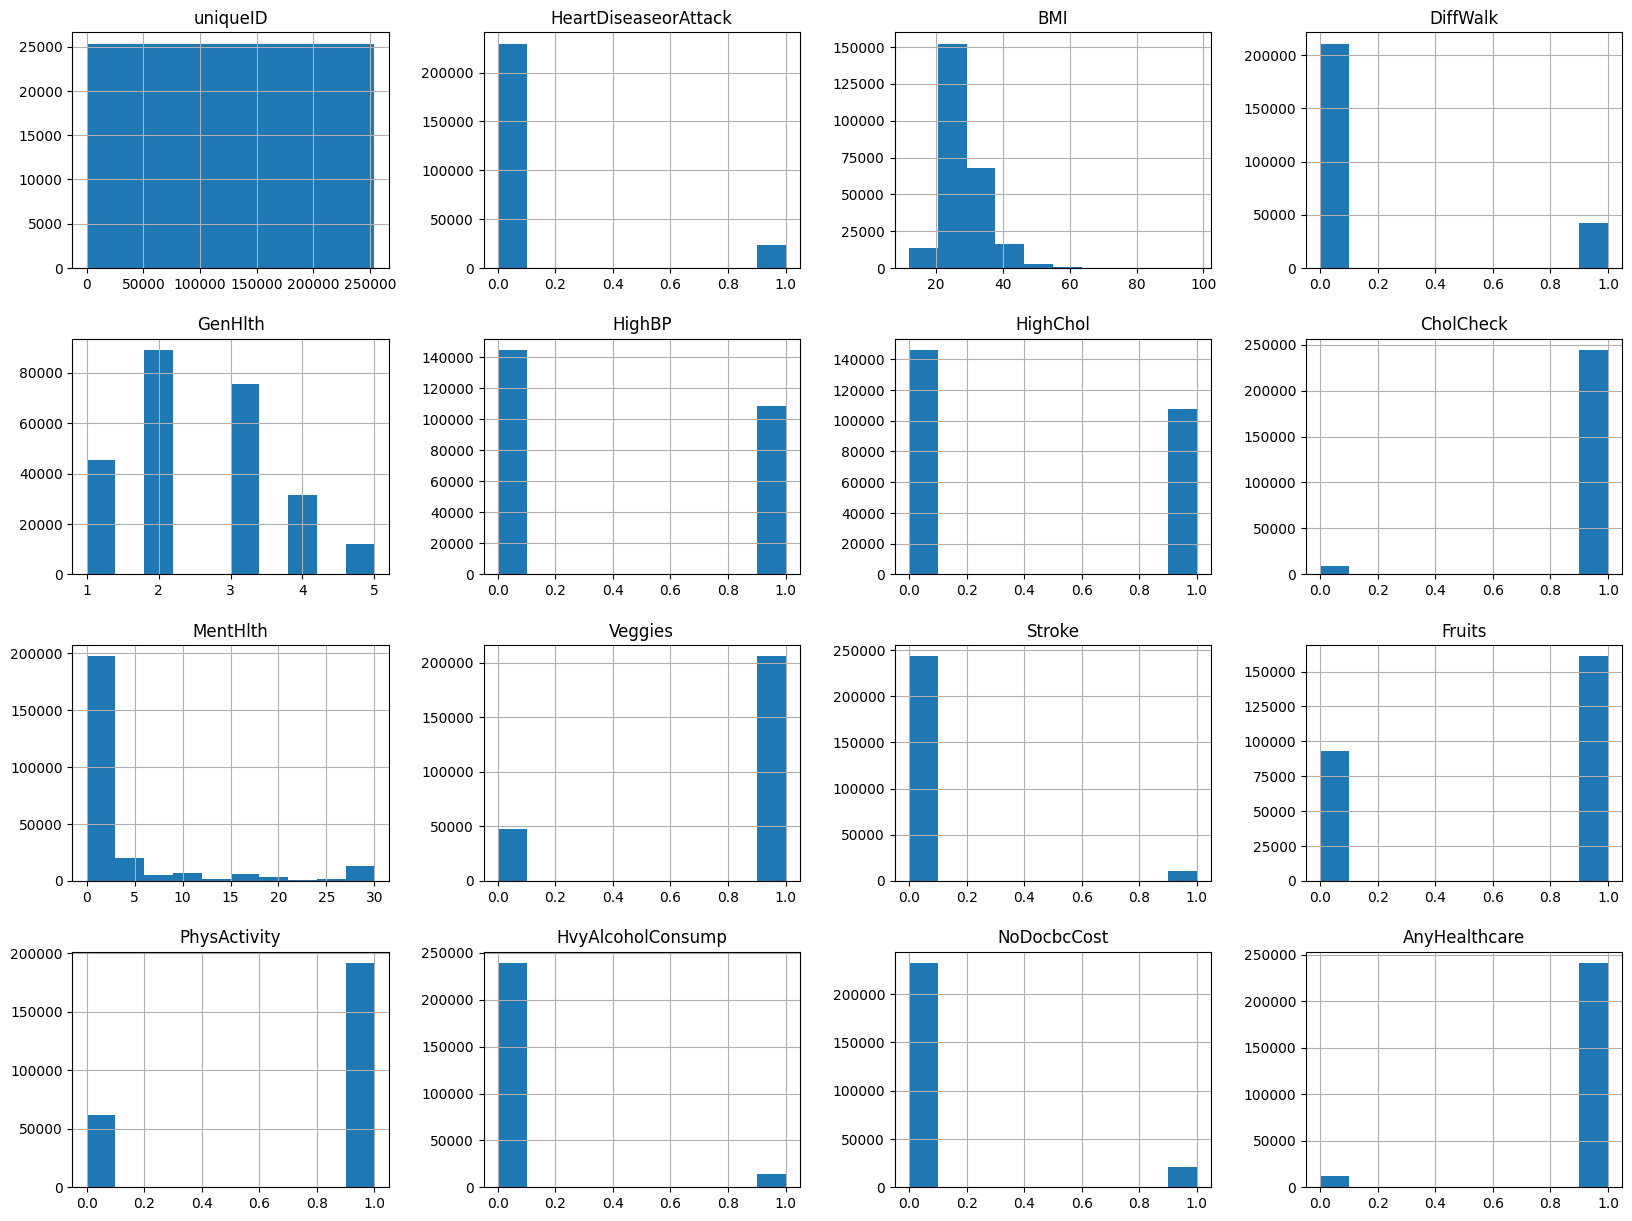

In [15]:
# Let's plot an histogram of our features in health_measures_df

health_measures_df.hist(figsize=(20,15));

In [16]:
# check demographic_df table head

demographic_df.head(3)

,uniqueID,Sex,Age,Education,Income
0,0,0,9,4,3
1,1,0,7,6,1
2,2,0,9,4,8


In [17]:
#Generate dataframe demographic_df descriptive statistics

demographic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
Sex,253680.0,0.440342,0.496429,0.0,0.00,0.0,1.00,1.0
Age,253680.0,8.032119,3.054220,1.0,6.00,8.0,10.00,13.0
Education,253680.0,5.050434,0.985774,1.0,4.00,5.0,6.00,6.0
Income,253680.0,6.053875,2.071148,1.0,5.00,7.0,8.00,8.0


In [18]:
#checking unique values in different variables

dem_col={}
for col in demographic_df.columns:
    dem_col[col]=demographic_df[col].value_counts().shape[0]
pd.DataFrame(dem_col,index=['unique_value_counts']).T    

,unique_value_counts
uniqueID,253680
Sex,2
Age,13
Education,6
Income,8


In [19]:
#check demographic_df non-null value counts and data types

demographic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   uniqueID   253680 non-null  int64
 1   Sex        253680 non-null  int64
 2   Age        253680 non-null  int64
 3   Education  253680 non-null  int64
 4   Income     253680 non-null  int64
dtypes: int64(5)
memory usage: 9.7 MB


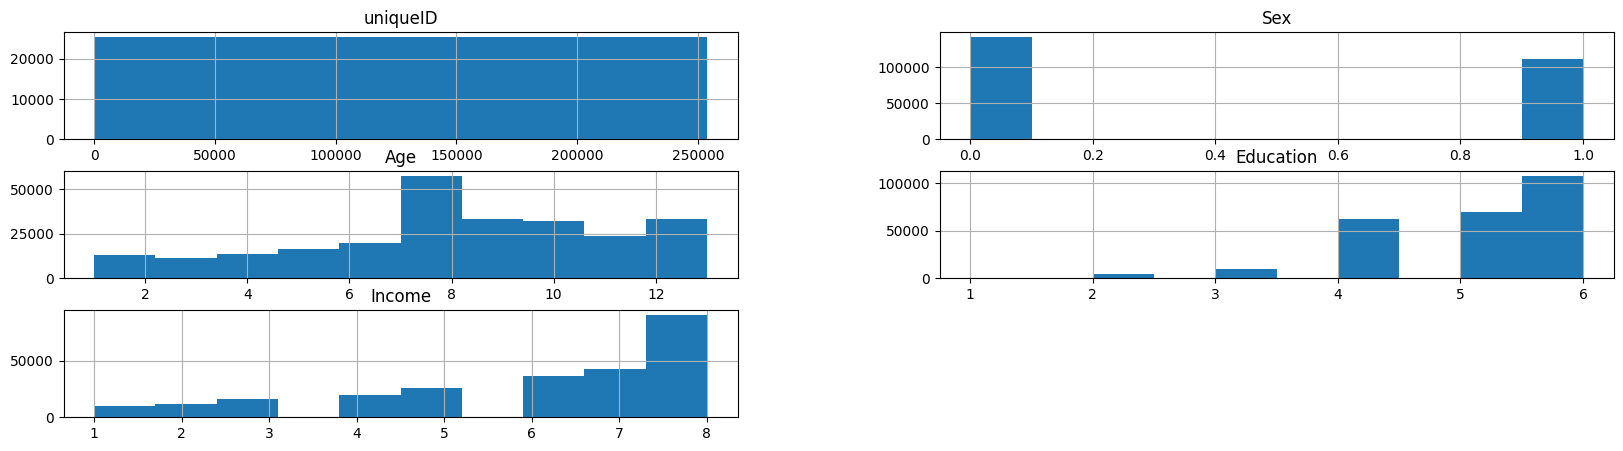

In [20]:
#plotting histograms of our features in demographic_df

demographic_df.hist(figsize=(20,5));

In [21]:
# check health_measures_df table head

enriched_df.head(3)

,uniqueID,PhysHlth,Smoker
0,0,15,1
1,1,0,1
2,2,30,0


In [22]:
#Generate dataframe enriched_df descriptive statistics

enriched_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.00,0.0,3.00,30.0
Smoker,253680.0,0.443169,0.496761,0.0,0.00,0.0,1.00,1.0


In [23]:
#checking unique values in different variables

enrich_col={}
for col in enriched_df.columns:
    enrich_col[col]=enriched_df[col].value_counts().shape[0]
pd.DataFrame(enrich_col,index=['unique_value_counts']).T

,unique_value_counts
uniqueID,253680
PhysHlth,31
Smoker,2


In [24]:
#check enriched_df non-null value counts and data types

enriched_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   uniqueID  253680 non-null  int64
 1   PhysHlth  253680 non-null  int64
 2   Smoker    253680 non-null  int64
dtypes: int64(3)
memory usage: 5.8 MB


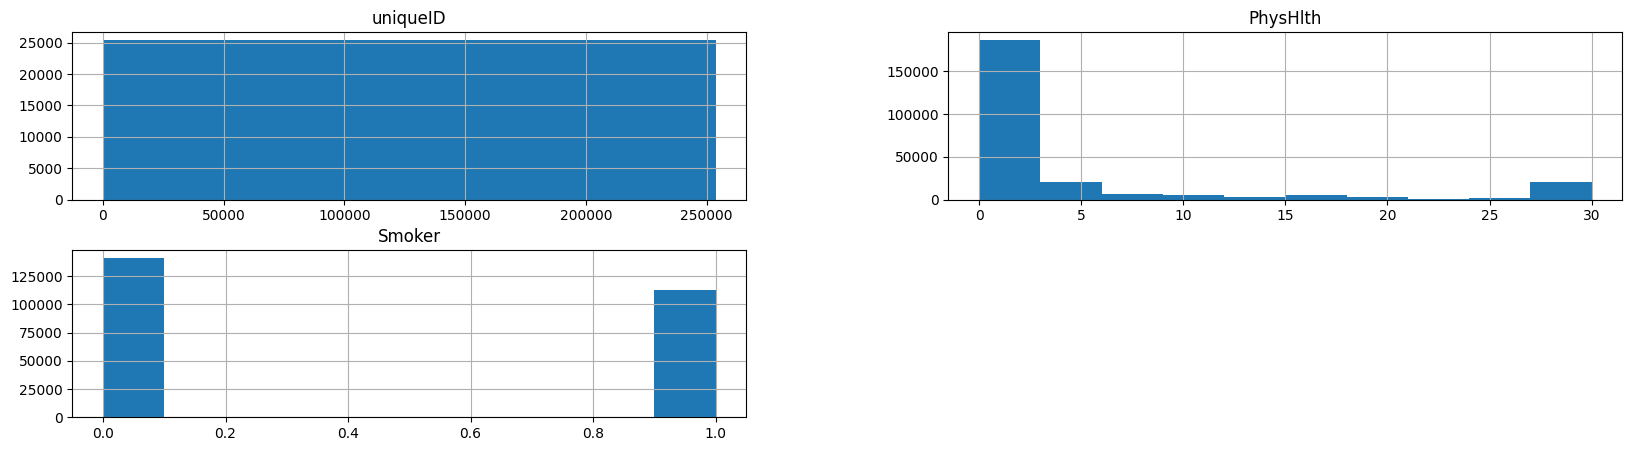

In [25]:
#plotting histograms of our features in enriched_df

enriched_df.hist(figsize=(20,5));

In [26]:
# check id_label_df table head

id_label_df.head(3)

,uniqueID,Diabetes_binary
0,0,0.0
1,1,0.0
2,2,0.0


In [27]:
#Generate dataframe id_label_df descriptive statistics

id_label_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.00,0.0,0.00,1.0


In [28]:
#checking unique values in different variables 

id_label_col={}
for col in id_label_df.columns:
    id_label_col[col]=id_label_df[col].value_counts().shape[0]
pd.DataFrame(id_label_col, index=['unique_value_counts']).T

,unique_value_counts
uniqueID,253680
Diabetes_binary,2


In [29]:
#check id_label_df non-null value counts and data types

id_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uniqueID         253680 non-null  int64  
 1   Diabetes_binary  253680 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


array([[<AxesSubplot: title={'center': 'uniqueID'}>,
        <AxesSubplot: title={'center': 'Diabetes_binary'}>]], dtype=object)

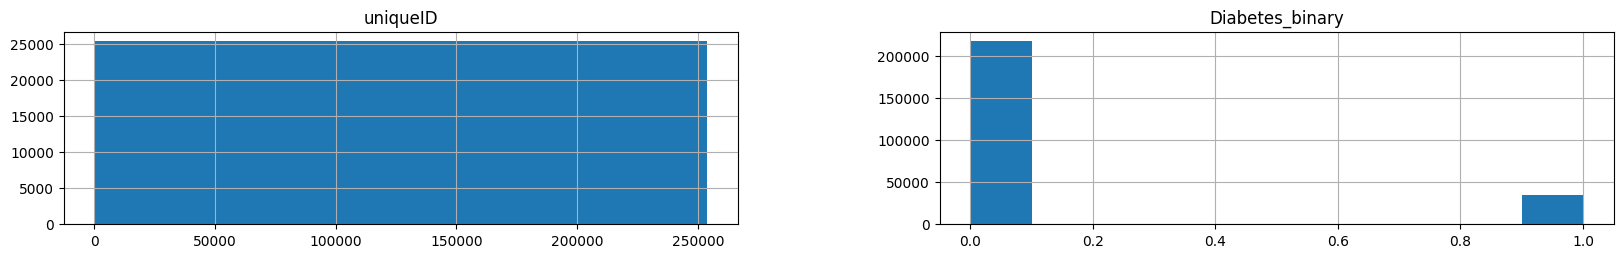

In [30]:
#plotting histograms of our features in id_label_df

id_label_df.hist(figsize=(20,2.5))

#### Outliers detection

In [31]:
# Almost all variables from all four tables are categorical variable.
#There are three variables which are not and having suspicious distribution BMI, MentHlth, PhysHlth
#Checking them for outliers

<Figure size 500x300 with 0 Axes>

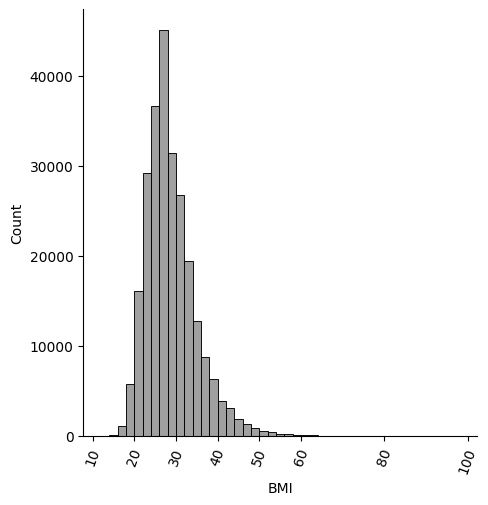

In [32]:
# Checking BMI distribution
plt.figure(figsize = [5, 3])
ticks=[10,20,30,40,50,60,80,100]
labels=['{}'.format(t) for t in ticks]
bins=np.arange(health_measures_df.BMI.min(),health_measures_df.BMI.max()+2,2)
sns.displot(health_measures_df.BMI,bins=bins,color='gray')
plt.xticks(ticks,labels,rotation=70);

<AxesSubplot: xlabel='BMI'>

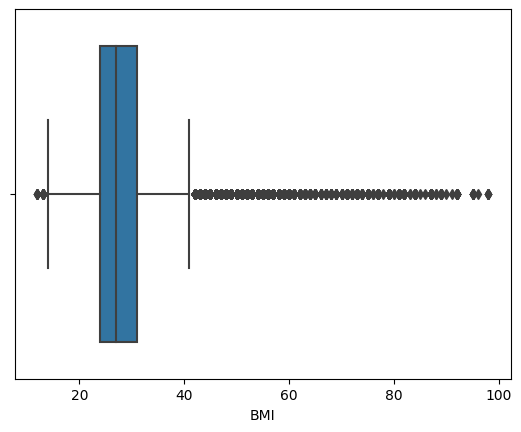

In [33]:
# right skewed distribution with peak at 28.
# try box plot to see outliers better
sns.boxplot(x='BMI',data=health_measures_df)


In [34]:
# there are a lot of outliers over 40.

<Figure size 500x300 with 0 Axes>

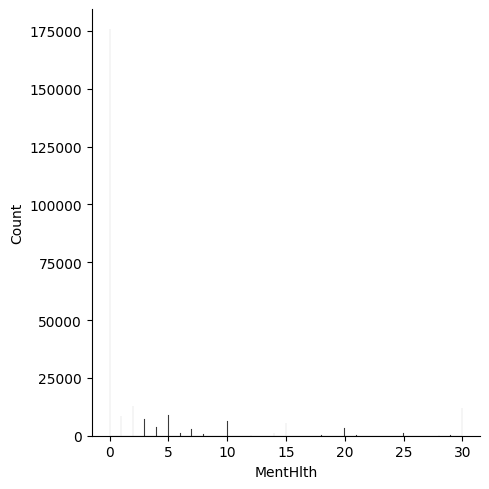

In [35]:
# checking MentHlth
plt.figure(figsize = [5, 3])
sns.displot(health_measures_df.MentHlth,color='black')


<AxesSubplot: ylabel='MentHlth'>

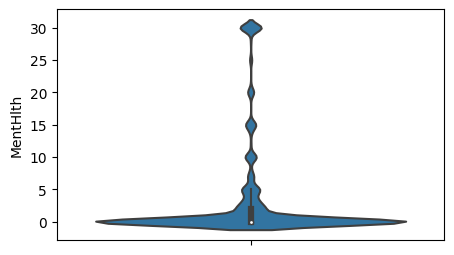

In [36]:
# highly right skewed distribution with massive peak at 0 and mini peaks ar 5,10,15 etc
# see violinplot
plt.figure(figsize = [5, 3])
sns.violinplot(y='MentHlth',data=health_measures_df)

In [37]:
# there are a lot of outliers over 5, there is pattern of peaks every 5 days.

<AxesSubplot: >

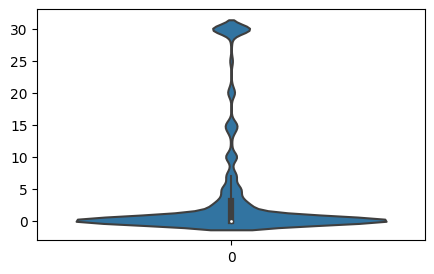

In [38]:
# checking PhysHlth 
# see violinplot
plt.figure(figsize = [5, 3])
sns.violinplot(enriched_df.PhysHlth)

In [39]:
# Similarly to MentHlth highly right skewed distribution with massive peak at 0 and mini peaks ar 5,10,15,25,30 


#### Summary Statistics findings
> * The number of rows in all 4 tables is 253680.
> * There are no non-null values in any table.
> * Unique values in variables(columns) are consistant with data description provided.
> * uniqueID is common variable(column) in all 4 dataframes and could be used to merge datasets.
> *	Each dataset has 253680 unique uniqueID values.
> * Data type of all variables in all the dataframes, excluding Diabetes_binary variable in id_label_df which type is float, is integer.
> *	'BMI' from health_measures_df  dataset has 84 unique integer values in the range 12-98.
> * 'PhysHlth' from enriched_df dataset has 31 unique integer values in range of 0-30
> * 'MentHlth' from enriched_df dataset has 31 unique integer values in range of 0-30
> *	There are a lot of outliers in BMI, MentHlth, PhysHlth.
> _There are too many of BMI outliers. They could be vital markers of diabetes, so there is need to include them in analysis. New categorical variable could be used with BMI ranges to include outliers in the analysis._ <br>
> _It seems that  MentHlth and PhysHlth has two variables in one. First, either individual has problems with health and second, how long he/she had the problem. New categorical variable could be introduced with ranges 0 and from 1-30 every 5 days. Could be used to analyse both existence and longevity of the problem_ <br>
> * The following variables has only two values 0 or 1:  
> 
> 	In health_measures_df  dataset:
> 	*	'HeartDiseaseorAttack'
> 	*	'DiffWalk'
> 	*   'HighBP'
> 	*   'HighChol'
> 	*   'CholCheck'
> 	*   'Veggies'
> 	*   'Stroke'
> 	*   'Fruits'
> 	*   'PhysActivity'
> 	*   'HvyAlcoholConsump'
> 	*   'NoDocbcCost'
> 	*   'AnyHealthcare'
> 	<br>
> 	In demographic_df dataset:
> 	 
> 	*	'Sex'
>   <br>
> 	In enriched_df dataset:  
> 	
> 	*	'Smoker' 
> 	<br>
>	In id_label_df dataset:
>	
>	*	'Diabetes_binary'
>	<br>
>_All of these variable shoulde be  the simplest type of categorical variable - boolean, excluding 'Sex'._<br>
>
> 	    
> 
> *	'GenHlth' from health_measures_df  dataset has integer values 1,2,3,4,5.
> *	'Age' from demographic_df dataset has 13 unique integer values in a range 1-13.
> * 'Education' from demographic_df dataset has 6 unique integer values in a range 1-6.
> * 'Income' from demographic_df dataset has 8 unique integer values in a range 1-8.<br>
>_It's difficult to understand the meaning of these variables, more meaningful variables could help with better understanding. 'Sex' in this case better to define as male and female._ 
       

## Data Cleaning

Before performing data cleaning joining four tables to reduce amount of work and make it more transparent.

In [40]:
# joining health_measures_df and demographic_df
health_demographic_df=health_measures_df.merge(demographic_df, how='inner', on='uniqueID')
# check
health_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   uniqueID              253680 non-null  int64
 1   HeartDiseaseorAttack  253680 non-null  int64
 2   BMI                   253680 non-null  int64
 3   DiffWalk              253680 non-null  int64
 4   GenHlth               253680 non-null  int64
 5   HighBP                253680 non-null  int64
 6   HighChol              253680 non-null  int64
 7   CholCheck             253680 non-null  int64
 8   MentHlth              253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  Stroke                253680 non-null  int64
 11  Fruits                253680 non-null  int64
 12  PhysActivity          253680 non-null  int64
 13  HvyAlcoholConsump     253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  AnyHealthcare         253680 non-n

In [41]:
# joining health_demographic_df and enriched_df
health_demographic_enriched_df = health_demographic_df.merge(enriched_df, how='inner', on='uniqueID')
#check
health_demographic_enriched_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   uniqueID              253680 non-null  int64
 1   HeartDiseaseorAttack  253680 non-null  int64
 2   BMI                   253680 non-null  int64
 3   DiffWalk              253680 non-null  int64
 4   GenHlth               253680 non-null  int64
 5   HighBP                253680 non-null  int64
 6   HighChol              253680 non-null  int64
 7   CholCheck             253680 non-null  int64
 8   MentHlth              253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  Stroke                253680 non-null  int64
 11  Fruits                253680 non-null  int64
 12  PhysActivity          253680 non-null  int64
 13  HvyAlcoholConsump     253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  AnyHealthcare         253680 non-n

In [42]:
# joining health_demographic_enriched_df and id_label_df
health_demographic_enriched_id_label_df = health_demographic_enriched_df.merge(id_label_df, how='inner', on='uniqueID')
#check
health_demographic_enriched_id_label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   uniqueID              253680 non-null  int64  
 1   HeartDiseaseorAttack  253680 non-null  int64  
 2   BMI                   253680 non-null  int64  
 3   DiffWalk              253680 non-null  int64  
 4   GenHlth               253680 non-null  int64  
 5   HighBP                253680 non-null  int64  
 6   HighChol              253680 non-null  int64  
 7   CholCheck             253680 non-null  int64  
 8   MentHlth              253680 non-null  int64  
 9   Veggies               253680 non-null  int64  
 10  Stroke                253680 non-null  int64  
 11  Fruits                253680 non-null  int64  
 12  PhysActivity          253680 non-null  int64  
 13  HvyAlcoholConsump     253680 non-null  int64  
 14  NoDocbcCost           253680 non-null  int64  
 15  

In [43]:
#copy dataframe before cleaning
diabetes= health_demographic_enriched_id_label_df.copy()
diabetes.head(10)

,uniqueID,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Sex,Age,Education,Income,PhysHlth,Smoker,Diabetes_binary
0,0,0,40,1,5,1,1,1,18,1,0,0,0,0,0,1,0,9,4,3,15,1,0.0
1,1,0,25,0,3,0,0,0,0,0,0,0,1,0,1,0,0,7,6,1,0,1,0.0
2,2,0,28,1,5,1,1,1,30,0,0,1,0,0,1,1,0,9,4,8,30,0,0.0
3,3,0,27,0,2,1,0,1,0,1,0,1,1,0,0,1,0,11,3,6,0,0,0.0
4,4,0,24,0,2,1,1,1,3,1,0,1,1,0,0,1,0,11,5,4,0,0,0.0
5,5,0,25,0,2,1,1,1,0,1,0,1,1,0,0,1,1,10,6,8,2,1,0.0
6,6,0,30,0,3,1,0,1,0,0,0,0,0,0,0,1,0,9,6,7,14,1,0.0
7,7,0,25,1,3,1,1,1,0,1,0,0,1,0,0,1,0,11,4,4,0,1,0.0
8,8,1,30,1,5,1,1,1,30,1,0,1,0,0,0,1,0,9,5,1,30,1,1.0
9,9,0,24,0,2,0,0,1,0,1,0,0,0,0,0,1,1,8,4,3,0,0,0.0


In [44]:
# sorting data types
# integer to bool where unique values 0 or 1 meaning yes/no
diabetes_new = diabetes.astype({'HeartDiseaseorAttack': bool,'DiffWalk': bool,'HighBP': bool, 'HighChol': bool,'CholCheck': bool,'Veggies': bool,'Stroke': bool,'Fruits': bool,'PhysActivity': bool,'HvyAlcoholConsump': bool,'NoDocbcCost': bool,'AnyHealthcare': bool,'Smoker': bool,'Diabetes_binary': bool})
diabetes_new.uniqueID=diabetes_new.uniqueID.astype('object')
#sorting 'Sex' data type and assigning  politically correct meaningful values'female' and'male'
diabetes_new.Sex=np.where(diabetes_new.Sex==0,'female','male')
diabetes_new.Sex=diabetes_new.Sex.astype('category')
#check
diabetes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   uniqueID              253680 non-null  object  
 1   HeartDiseaseorAttack  253680 non-null  bool    
 2   BMI                   253680 non-null  int64   
 3   DiffWalk              253680 non-null  bool    
 4   GenHlth               253680 non-null  int64   
 5   HighBP                253680 non-null  bool    
 6   HighChol              253680 non-null  bool    
 7   CholCheck             253680 non-null  bool    
 8   MentHlth              253680 non-null  int64   
 9   Veggies               253680 non-null  bool    
 10  Stroke                253680 non-null  bool    
 11  Fruits                253680 non-null  bool    
 12  PhysActivity          253680 non-null  bool    
 13  HvyAlcoholConsump     253680 non-null  bool    
 14  NoDocbcCost           253680 non-nul

In [45]:
# Sorting 'GenHlth','Age','Education','Income' data types, making Ordinal Categorical
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories= [1,2,3,4,5], ordered=True)
diabetes_new.GenHlth= diabetes_new.GenHlth.astype(cat_type)
cat_type_1 = CategoricalDtype(categories= [1,2,3,4,5,6,7,8,9,10,11,12,13], ordered=True)
diabetes_new.Age= diabetes_new.Age.astype(cat_type_1)
cat_type_2=CategoricalDtype(categories=[1,2,3,4,5,6], ordered=True)
diabetes_new.Education=diabetes_new.Education.astype(cat_type_2)
cat_type_3=CategoricalDtype(categories=[1,2,3,4,5,6,7,8], ordered=True)
diabetes_new.Income=diabetes_new.Income.astype(cat_type_3)
#check
diabetes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   uniqueID              253680 non-null  object  
 1   HeartDiseaseorAttack  253680 non-null  bool    
 2   BMI                   253680 non-null  int64   
 3   DiffWalk              253680 non-null  bool    
 4   GenHlth               253680 non-null  category
 5   HighBP                253680 non-null  bool    
 6   HighChol              253680 non-null  bool    
 7   CholCheck             253680 non-null  bool    
 8   MentHlth              253680 non-null  int64   
 9   Veggies               253680 non-null  bool    
 10  Stroke                253680 non-null  bool    
 11  Fruits                253680 non-null  bool    
 12  PhysActivity          253680 non-null  bool    
 13  HvyAlcoholConsump     253680 non-null  bool    
 14  NoDocbcCost           253680 non-nul

In [46]:
diabetes=diabetes_new.copy()

## Feature engineering

In [47]:
diabetes_new.head()

,uniqueID,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Sex,Age,Education,Income,PhysHlth,Smoker,Diabetes_binary
0,0,False,40,True,5,True,True,True,18,True,False,False,False,False,False,True,female,9,4,3,15,True,False
1,1,False,25,False,3,False,False,False,0,False,False,False,True,False,True,False,female,7,6,1,0,True,False
2,2,False,28,True,5,True,True,True,30,False,False,True,False,False,True,True,female,9,4,8,30,False,False
3,3,False,27,False,2,True,False,True,0,True,False,True,True,False,False,True,female,11,3,6,0,False,False
4,4,False,24,False,2,True,True,True,3,True,False,True,True,False,False,True,female,11,5,4,0,False,False


In [48]:
# Creating 4 new variables with meaningful values of variables:'GenHlth','Age' ,'Education','Income'
# Creating 'GenHlth_status' variable
# create a list of conditions
conditions_3=[(diabetes_new.GenHlth==5),\
            (diabetes_new.GenHlth==4),\
            (diabetes_new.GenHlth==3),\
            (diabetes_new.GenHlth==2),\
            (diabetes_new.GenHlth==1)] 
#create a list of the value ranges we want to assign for each condition
ranges_3=['poor','fair','good','very good','excellent']
# create a new column 'BMI_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['GenHlth_status'] = np.select(conditions_3,ranges_3)

# Creating 'Age_range' variable
# create a list of conditions
conditions_4=[(diabetes_new.Age==1),\
            (diabetes_new.Age==2),\
            (diabetes_new.Age==3),\
            (diabetes_new.Age==4),\
            (diabetes_new.Age==5),\
            (diabetes_new.Age==6),\
            (diabetes_new.Age==7),\
            (diabetes_new.Age==8),\
            (diabetes_new.Age==9),\
            (diabetes_new.Age==10),\
            (diabetes_new.Age==11),\
            (diabetes_new.Age==12),\
            (diabetes_new.Age==13)] 
#create a list of the value ranges we want to assign for each condition
ranges_4=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-99']
# create a new column 'BMI_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['Age_range'] = np.select(conditions_4,ranges_4)

# Creating 'Education_status' variable
# create a list of conditions
conditions_5=[(diabetes_new.Education>=1) & (diabetes_new.Education<=3),\
            (diabetes_new.Education==4),\
            (diabetes_new.Education==5),\
            (diabetes_new.Education==6),\
            (diabetes_new.Education==9)] 
#create a list of the value ranges we want to assign for each condition
ranges_5=['Didn’t graduate high school','Graduated high school','Attended college or technical school','Graduated college or technical school','Unknown']
# create a new column 'BMI_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['Education_status'] = np.select(conditions_5,ranges_5)

# Creating 'Income_range' variable
# create a list of conditions
conditions_6=[(diabetes_new.Income==1)|(diabetes_new.Income==2),\
            (diabetes_new.Income==3)|(diabetes_new.Income==4),\
            (diabetes_new.Income==5),\
            (diabetes_new.Income==6),\
            (diabetes_new.Income==7)|(diabetes_new.Income==8)] 
#create a list of the value ranges we want to assign for each condition
ranges_6=['<15K','15K-25K','25K-35K','35K-50K','>50K']
# create a new column 'BMI_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['Income_range'] = np.select(conditions_6,ranges_6)



In [49]:
#making 'GenHlth_status','Age_range' ,'Education_status','Income_range' Ordinal Categorical type
from pandas.api.types import CategoricalDtype

cat_type_7 = CategoricalDtype(categories= ['poor','fair','good','very good','excellent'], ordered=True)
diabetes_new.GenHlth_status= diabetes_new.GenHlth_status.astype(cat_type_7)

cat_type_8 = CategoricalDtype(categories= ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-99'], ordered=True)
diabetes_new.Age_range= diabetes_new.Age_range.astype(cat_type_8)

cat_type_9=CategoricalDtype(categories=['Didn’t graduate high school','Graduated high school','Attended college or technical school','Graduated college or technical school'], ordered=True)
diabetes_new.Education_status=diabetes_new.Education_status.astype(cat_type_9)

cat_type_10 = CategoricalDtype(categories= ['<15K','15K-25K','25K-35K','35K-50K','>50K'], ordered=True)
diabetes_new.Income_range= diabetes_new.Income_range.astype(cat_type_10)

diabetes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   uniqueID              253680 non-null  object  
 1   HeartDiseaseorAttack  253680 non-null  bool    
 2   BMI                   253680 non-null  int64   
 3   DiffWalk              253680 non-null  bool    
 4   GenHlth               253680 non-null  category
 5   HighBP                253680 non-null  bool    
 6   HighChol              253680 non-null  bool    
 7   CholCheck             253680 non-null  bool    
 8   MentHlth              253680 non-null  int64   
 9   Veggies               253680 non-null  bool    
 10  Stroke                253680 non-null  bool    
 11  Fruits                253680 non-null  bool    
 12  PhysActivity          253680 non-null  bool    
 13  HvyAlcoholConsump     253680 non-null  bool    
 14  NoDocbcCost           253680 non-nul

In [50]:
diabetes=diabetes_new.copy()
# Dealing with 'BMI', 'PhysHlth', 'MentHlth'
# Creating three new categorical variables associated with existing variable value ranges to simplify analysis
# Creating 'BMI_range' variable: 'BMI' in range 18.5-24.9 -> 'Normal',  'BMI' in range 25-29.9 ->'Overweight',  'BMI' >30 ->'Obese', 'BMI'< 18.5 -> 'Underweight'

#create a list of conditions
conditions=[(diabetes_new.BMI<18.5),\
            (diabetes_new.BMI>=18.5) & (diabetes_new.BMI<=24.9),\
            (diabetes_new.BMI>=25) & (diabetes_new.BMI<=29.9),\
            (diabetes_new.BMI>=30)] 
#create a list of the value ranges we want to assign for each condition
ranges=['Underweight','Normal','Overweight','Obese']
# create a new column 'BMI_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['BMI_range'] = np.select(conditions,ranges)

# Creating 'PhysHlth_range' variable: range for every 5 days of Physical Illness

#create a list of conditions
conditions_1=[(diabetes_new.PhysHlth==0),\
            (diabetes_new.PhysHlth>=1) & (diabetes_new.PhysHlth<=5),\
            (diabetes_new.PhysHlth>=6) & (diabetes_new.PhysHlth<=10),\
            (diabetes_new.PhysHlth>=11) & (diabetes_new.PhysHlth<=15),\
            (diabetes_new.PhysHlth>=16) & (diabetes_new.PhysHlth<=20),\
            (diabetes_new.PhysHlth>=21) & (diabetes_new.PhysHlth<=25),\
            (diabetes_new.PhysHlth>25)] 
          
#create a list of the value ranges we want to assign for each condition
ranges_1=['No Physical Health Issues','1-5 days','6-10 days','11-15 days',\
          '16-20 days','21-25 days','26-30 days']
              
# create a new column 'PhysHlth_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['PhysHlth_range'] = np.select(conditions_1,ranges_1)

# Creating 'MentHlth_range' variable: range for every 5 days of Mental Illness

#create a list of conditions
conditions_2=[(diabetes_new.MentHlth==0),\
            (diabetes_new.MentHlth>=1) & (diabetes_new.MentHlth<=5),\
            (diabetes_new.MentHlth>=6) & (diabetes_new.MentHlth<=10),\
            (diabetes_new.MentHlth>=11) & (diabetes_new.MentHlth<=15),\
            (diabetes_new.MentHlth>=16) & (diabetes_new.MentHlth<=20),\
            (diabetes_new.MentHlth>=21) & (diabetes_new.MentHlth<=25),\
            (diabetes_new.MentHlth>25)] 
          
#create a list of the value ranges we want to assign for each condition
ranges_2=['No Mental Health Issues','1-5 days','6-10 days','11-15 days',\
          '16-20 days','21-25 days','26-30 days']
              
# create a new column 'MentHlth_range' and use np.select to assign values to it using our lists as arguments
diabetes_new['MentHlth_range'] = np.select(conditions_2,ranges_2)
#check
diabetes_new.head()

,uniqueID,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Sex,Age,Education,Income,PhysHlth,Smoker,Diabetes_binary,GenHlth_status,Age_range,Education_status,Income_range,BMI_range,PhysHlth_range,MentHlth_range
0,0,False,40,True,5,True,True,True,18,True,False,False,False,False,False,True,female,9,4,3,15,True,False,poor,60-64,Graduated high school,15K-25K,Obese,11-15 days,16-20 days
1,1,False,25,False,3,False,False,False,0,False,False,False,True,False,True,False,female,7,6,1,0,True,False,good,50-54,Graduated college or technical school,<15K,Overweight,No Physical Health Issues,No Mental Health Issues
2,2,False,28,True,5,True,True,True,30,False,False,True,False,False,True,True,female,9,4,8,30,False,False,poor,60-64,Graduated high school,>50K,Overweight,26-30 days,26-30 days
3,3,False,27,False,2,True,False,True,0,True,False,True,True,False,False,True,female,11,3,6,0,False,False,very good,70-74,Didn’t graduate high school,35K-50K,Overweight,No Physical Health Issues,No Mental Health Issues
4,4,False,24,False,2,True,True,True,3,True,False,True,True,False,False,True,female,11,5,4,0,False,False,very good,70-74,Attended college or technical school,15K-25K,Normal,No Physical Health Issues,1-5 days


In [51]:
#making 'BMI_range', 'PhysHlth_range', 'MentHlth_range'  Ordinal Categorical type
from pandas.api.types import CategoricalDtype

cat_type_4 = CategoricalDtype(categories= ['Underweight','Normal','Overweight','Obese'], ordered=True)
diabetes_new.BMI_range= diabetes_new.BMI_range.astype(cat_type_4)

cat_type_5 = CategoricalDtype(categories= ['No Physical Health Issues','1-5 days','6-10 days','11-15 days','16-20 days','21-25 days','26-30 days'], ordered=True)
diabetes_new.PhysHlth_range= diabetes_new.PhysHlth_range.astype(cat_type_5)

cat_type_6=CategoricalDtype(categories=['No Mental Health Issues','1-5 days','6-10 days','11-15 days','16-20 days','21-25 days','26-30 days'], ordered=True)
diabetes_new.MentHlth_range=diabetes_new.MentHlth_range.astype(cat_type_6)
#check
diabetes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   uniqueID              253680 non-null  object  
 1   HeartDiseaseorAttack  253680 non-null  bool    
 2   BMI                   253680 non-null  int64   
 3   DiffWalk              253680 non-null  bool    
 4   GenHlth               253680 non-null  category
 5   HighBP                253680 non-null  bool    
 6   HighChol              253680 non-null  bool    
 7   CholCheck             253680 non-null  bool    
 8   MentHlth              253680 non-null  int64   
 9   Veggies               253680 non-null  bool    
 10  Stroke                253680 non-null  bool    
 11  Fruits                253680 non-null  bool    
 12  PhysActivity          253680 non-null  bool    
 13  HvyAlcoholConsump     253680 non-null  bool    
 14  NoDocbcCost           253680 non-nul

In [52]:
#check
diabetes_new.sample(20)

,uniqueID,HeartDiseaseorAttack,BMI,DiffWalk,GenHlth,HighBP,HighChol,CholCheck,MentHlth,Veggies,Stroke,Fruits,PhysActivity,HvyAlcoholConsump,NoDocbcCost,AnyHealthcare,Sex,Age,Education,Income,PhysHlth,Smoker,Diabetes_binary,GenHlth_status,Age_range,Education_status,Income_range,BMI_range,PhysHlth_range,MentHlth_range
103740,103740,False,23,False,2,False,True,True,0,True,False,True,True,False,False,True,female,9,5,8,0,False,False,very good,60-64,Attended college or technical school,>50K,Normal,No Physical Health Issues,No Mental Health Issues
59653,59653,False,40,False,4,True,False,True,4,True,True,False,True,True,False,True,female,2,5,1,0,True,False,fair,25-29,Attended college or technical school,<15K,Obese,No Physical Health Issues,1-5 days
139140,139140,False,27,False,3,False,True,True,1,True,False,True,True,False,True,True,female,6,6,6,2,False,False,good,45-49,Graduated college or technical school,35K-50K,Overweight,1-5 days,1-5 days
160282,160282,False,24,False,4,False,True,True,0,False,False,False,True,False,False,False,male,1,4,7,0,False,False,fair,18-24,Graduated high school,>50K,Normal,No Physical Health Issues,No Mental Health Issues
235072,235072,False,35,True,5,True,True,True,30,True,False,True,True,False,False,True,female,8,4,1,21,True,False,poor,55-59,Graduated high school,<15K,Obese,21-25 days,26-30 days
38193,38193,False,25,False,1,False,False,True,0,True,False,True,True,False,False,True,female,11,6,4,0,True,False,excellent,70-74,Graduated college or technical school,15K-25K,Overweight,No Physical Health Issues,No Mental Health Issues
78886,78886,False,24,False,1,False,False,True,0,True,False,True,True,False,False,True,female,3,5,8,0,False,False,excellent,30-34,Attended college or technical school,>50K,Normal,No Physical Health Issues,No Mental Health Issues
196349,196349,False,29,False,2,True,False,True,2,True,False,False,True,False,True,True,female,8,4,7,7,False,False,very good,55-59,Graduated high school,>50K,Overweight,6-10 days,1-5 days
231525,231525,False,31,False,3,True,False,True,0,False,False,False,True,False,False,True,male,12,4,2,0,True,False,good,75-79,Graduated high school,<15K,Obese,No Physical Health Issues,No Mental Health Issues
214445,214445,False,31,True,4,True,False,True,0,False,False,False,False,False,False,True,female,13,5,6,0,False,False,fair,80-99,Attended college or technical school,35K-50K,Obese,No Physical Health Issues,No Mental Health Issues


## Distribution Analysis

In [53]:
diabetes=diabetes_new.copy()

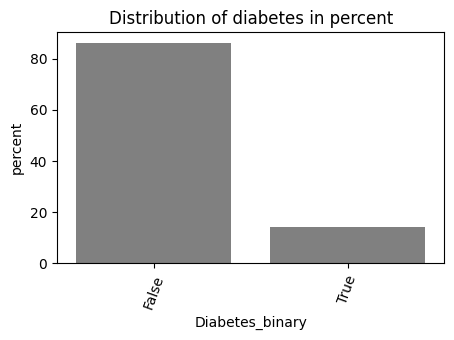

In [54]:
# distribution of 'Diabetes_binary' in percent
plt.figure(figsize = [5, 3])
pct=diabetes.Diabetes_binary.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Diabetes_binary','Diabetes_binary':'percent'},axis=1)
sns.barplot(data=pct, x='Diabetes_binary', y='percent', color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of diabetes in percent');

In [ ]:
Only around 10% of individuals has diabetes

SyntaxError: invalid syntax (3638959634.py, line 1)

In [49]:
# distribution of 'Age_range' in percent
plt.figure(figsize = [5, 3])
pct=diabetes.Age_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Age_range','Age_range':'percent'},axis=1)
sns.barplot(data=pct, x='Age_range', y='percent', color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of age range in percent');

The mode of age range distribution 12% is 60-64,median 50-54 and range from 18-24 to 80-89.

In [50]:
# distribution of 'Education_status'
plt.figure(figsize = [5, 3])
pct = diabetes.Education_status.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Education_status','Education_status':'percent'}, axis=1)
sns.barplot(x='Education_status', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of education status in percent');

The peak of education status distribution around 40% is Graduated college or technical school.

In [51]:
# distribution of 'Income_range'
plt.figure(figsize = [5, 3])
pct = diabetes.Income_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Income_range','Income_range':'percent'}, axis=1)
sns.barplot(x='Income_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of income range in percent');

The peak of income range distribution over 50% is >50K.

In [52]:
# 'BMI_range' distribution
plt.figure(figsize = [5, 3])
pct = diabetes.BMI_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'BMI_range','BMI_range':'percent'}, axis=1)
sns.barplot(x='BMI_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of BMI range in percent');


More than 70% of BMI range is either overweight(~37%) or obese(~34%)

In [53]:
# 'GenHlth_status' distribution
plt.figure(figsize = [5, 3])
pct = diabetes.GenHlth_status.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'GenHlth_status','GenHlth_status':'percent'}, axis=1)
sns.barplot(x='GenHlth_status', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.title('Distribution of General health status in percent');

35% has very good health status, 30% good and only 5% poor. Above 80% have healyh status good and above.

In [54]:
# 'HeartDiseaseorAttack' distribution
plt.figure(figsize = [5, 3])
ticks = [5,10,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.HeartDiseaseorAttack.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'HeartDiseaseorAttack','HeartDiseaseorAttack':'percent'}, axis=1)
sns.barplot(x='HeartDiseaseorAttack', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having Heart Disease or Attack in percent');

Only 10% of all individuals have or had heart desease or attack

In [55]:
# 'DiffWalk' distribution
plt.figure(figsize = [5, 3])
ticks = [10,15,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.DiffWalk.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'DiffWalk','DiffWalk':'percent'}, axis=1)
sns.barplot(x='DiffWalk', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having difficulty to walk or climb stairs in percent');

15% of all individuals have difficulty to walk or climb stairs

In [56]:
# 'HighBP' distribution
plt.figure(figsize = [5, 3])
ticks = [10,40,50,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.HighBP.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'HighBP','HighBP':'percent'}, axis=1)
sns.barplot(x='HighBP', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having high blood pressure in percent');

Above 40% of all individuals have high blood pressure

In [57]:
# 'HighChol' distribution
plt.figure(figsize = [5, 3])
ticks = [20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.HighChol.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'HighChol','HighChol':'percent'}, axis=1)
sns.barplot(x='HighChol', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having high cholesterol in percent');

Around 40% of all individuals have high cholesterol

In [58]:
# 'CholCheck' distribution
plt.figure(figsize = [5, 3])
ticks = [5,20,40,60,80,95]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.CholCheck.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'CholCheck','CholCheck':'percent'}, axis=1)
sns.barplot(x='CholCheck', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having cholesterol check last 5 years in percent');

Around 95% had cholesterol check last 5 years

In [59]:
# 'Veggies' distribution
plt.figure(figsize = [5, 3])
ticks = [5,20,40,60,80,95]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.Veggies.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Veggies','Veggies':'percent'}, axis=1)
sns.barplot(x='Veggies', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of eating at least one vegetable a day in percent');

80% individuals are eating at least one vegetable a day

In [60]:
# 'Fruits' distribution
plt.figure(figsize = [5, 3])
ticks = [20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.Fruits.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Fruits','Fruits':'percent'}, axis=1)
sns.barplot(x='Fruits', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of eating at least one fruit a day in percent');

Over 60% individuals are eating at least one fruit a day

In [61]:
# 'Stroke' distribution
plt.figure(figsize = [5, 3])
ticks = [5,20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.Stroke.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Stroke','Stroke':'percent'}, axis=1)
sns.barplot(x='Stroke', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having a stroke in percent');

Less than 5% of all idividuals had stroke

In [62]:
# 'PhysActivity' distribution
plt.figure(figsize = [5, 3])
ticks = [20,40,60,75,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.PhysActivity.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'PhysActivity','PhysActivity':'percent'}, axis=1)
sns.barplot(x='PhysActivity', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having a physical activity in the last 30 days in percent');

Around 75% of all individuals had a physical activity in the last 30 days

In [63]:
# 'HvyAlcoholConsump' distribution
plt.figure(figsize = [5, 3])
ticks = [5,20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.HvyAlcoholConsump.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'HvyAlcoholConsump','HvyAlcoholConsump':'percent'}, axis=1)
sns.barplot(x='HvyAlcoholConsump', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having more than 7/14 units of alcohol for female/male a week in percent');

More than 5% of all individuals having LESS than 7/14 units of alcohol for female/male a week

In [64]:
# 'NoDocbcCost' distribution
plt.figure(figsize = [5, 3])
ticks = [8,20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.NoDocbcCost.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'NoDocbcCost','NoDocbcCost':'percent'}, axis=1)
sns.barplot(x='NoDocbcCost', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having a need in a doctor, but could not afford it in the last 12 month in percent');

Around 8% of all individuals had a need in a doctor, but could not afford it in the last 12 month

In [65]:
# 'AnyHealthcare' distribution
plt.figure(figsize = [5, 3])
ticks = [5,20,40,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.AnyHealthcare.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'AnyHealthcare','AnyHealthcare':'percent'}, axis=1)
sns.barplot(x='AnyHealthcare', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having any healhcare cover in percent');

95% of all individuals of all have a healthcare cover

In [66]:
# 'Sex' distribution
plt.figure(figsize = [5, 3])
ticks = [20,44,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.Sex.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Sex','Sex':'percent'}, axis=1)
sns.barplot(x='Sex', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of female and male individuals in percent');

Ratio of females to males is around 56 to 44

In [67]:
# 'Smoker' distribution
plt.figure(figsize = [5, 3])
ticks = [20,44,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.Smoker.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'Smoker','Smoker':'percent'}, axis=1)
sns.barplot(x='Smoker', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of individual beeing a smoker in percent');

There are 44% smokers out of all individuals

In [68]:
# 'PhysHlth_range' distribution
plt.figure(figsize = [5, 3])
ticks = [8,18,30,44,62,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.PhysHlth_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'PhysHlth_range','PhysHlth_range':'percent'}, axis=1)
sns.barplot(x='PhysHlth_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of beeing ill in the last 30 days in percent');

Around 62% of all individuals haven't had any physical health issues last 30 days

In [69]:
# 'PhysHlth_range' distribution without individuals without any physical health issues
diabetes_s=diabetes[~diabetes.PhysHlth_range.isin(['No Physical Health Issues'])]
diabetes_s.PhysHlth_range=diabetes_s.PhysHlth_range.astype('object')
plt.figure(figsize = [5, 3])
ticks = [5,10,15,20,30,40,50,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes_s.PhysHlth_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'PhysHlth_range','PhysHlth_range':'percent'}, axis=1)
sns.barplot(x='PhysHlth_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of illness or injury days of all individuals with illness/injury last 30 days in percent');

50% of all individuals with health issues have 1-5 days of illness or injury, above 20% have 26-30 days, around 12% -6-10 days.

In [70]:
# 'MentHlth_range' distribution
plt.figure(figsize = [5, 3])
ticks = [10,20,30,70,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes.MentHlth_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'MentHlth_range','MentHlth_range':'percent'}, axis=1)
sns.barplot(x='MentHlth_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of having mental issues in the last 30 days in percent');

About 69% of all individuals haven't had any mental issues last 30 days

In [71]:
# 'MentHlth_range' distribution without individuals without any mental health issues
diabetes_s=diabetes[~diabetes.MentHlth_range.isin(['No Mental Health Issues'])]
diabetes_s.MentHlth_range=diabetes_s.MentHlth_range.astype('object')
plt.figure(figsize = [5, 3])
ticks = [5,15,40,54,60,80]
labels =['{}'.format(t) for t in ticks]
pct = diabetes_s.MentHlth_range.value_counts(normalize=True).mul(100).reset_index().rename({'index': 'MentHlth_range','MentHlth_range':'percent'}, axis=1)
sns.barplot(x='MentHlth_range', y='percent', data=pct, color='gray')
plt.xticks(rotation=70)
plt.yticks(ticks,labels)
plt.title('Distribution of mental issue days of all individuals with mental issues last 30 days in percent');

54% of all individuals with mental issues in the last 30 days  had them for 1-5 days, around 16% for 26-30 days, around 14% for 6-10 days.

#### Distribution analysis findings
>*	Only around 10% of individuals in the dataset have diabetes
>*	Ratio of females to males is around 56% to 44%
>*	The mode of age range distribution 12% is 60-64,median 50-54 and range from 18-24 to 80-89.
>*	The peak of education status distribution around 40% is Graduated college or technical school.
>*	The peak of income range distribution over 50% is >50K.
>*	Around 8% of all individuals had a need in a doctor, but could not afford it in the last 12 month
>*	95% of all individuals of all have a healthcare cover
>*	More than 70% of individuals are either overweight(~37%) or obese(~34%)
>*	35% of all individuals feel very good , 30% good and only 5% poor. Above 80% feel good and above.
>*	15% of all individuals have difficulty to walk or climb stairs>
>*	Around 95% had cholesterol check last 5 years
>*	80% individuals are eating at least one vegetable a day
>*	Over 60% individuals are eating at least one fruit a day
>*	Around 75% of all individuals had a physical activity in the last 30 days
>*	More than 5% of all individuals having LESS than 7/14 units of alcohol for female/male a week
>*	There are 44% smokers out of all individuals
>*	Only 10% of all individuals have or had heart desease or attack.
>*	Above 40% of all individuals have high blood pressure
>*	Around 40% of all individuals have high cholesterol
>*	Less than 5% of all idividuals had stroke
>*	Around 62% of all individuals haven't had any physical health issues last 30 days
>		*	50% of all individuals with health issues have 1-5 days of illness or injury, above 20% have 26-30 days, around 12% -6-10 days.
>*	About 69% of all individuals haven't  had any mental issues last 30 days
>		*	54% of all individuals with mental issues in the last 30 days  had them for 1-5 days, around 16% for 26-30 days, around 14% for 6-10 days.






### Cross-Correlation Analysis and Raising Data Questions

**What are relationships between age and diabetes?**

In [72]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Age_range', hue='Diabetes_binary',multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.ylabel('Diabetes proportion')
plt.xlabel('Age')
plt.legend(['Diabetes/prediabetes','No diabetes'], title = 'Diabetes')
plt.title('Proportions of diabetes in different age groups');

Diabetes is raising from 1% at 18-24 to 10% at 45-45 to its maximum above 20% at around 70-74.

**What sex have more diabetes?**

In [73]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Sex', hue='Diabetes_binary',multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.ylabel('Diabetes proportion')
plt.xlabel('Sex')
plt.legend(['Diabetes/prediabetes','No diabetes'], title = 'Diabetes')
plt.title('Proportions of diabetes in different sex groups');

There is insignificant difference between females around 12% with diabetes and males around 15% having diabetes. 

**What are relationships between sex, age and diabetes?**

In [74]:
legend_names={'Diabetes/prediabetes':'orange','No diabetes':'gray'}
g=sns.FacetGrid(diabetes,col='Age_range',col_wrap=5)
g.map_dataframe(sns.histplot,x='Sex',hue='Diabetes_binary',multiple='fill', palette=sns.blend_palette(['gray','orange'],2))
g.set_titles(col_template='Age: {col_name}')
plt.legend(legend_names,bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,title='Diabetes');
g.set_axis_labels('Sex','Diabetes proportion')
g.fig.suptitle('Relationships between sex, age and diabetes',y=1.02);


Amount of diabetes growing gradually with age in both male in females from less than 1% for both females and males together in 18-24 to around 20% for each sex in all age group starting with 60-64. In each age group upto 39 years old  females have upto 1% more diabetes than males. After 35-39 the amount of diabetes in males gradually overtaking the amount of diabetes in females. Males have upto 2% more diabetes than females in the later stages of life.

**What are relationships between general health, age and diabetes?**

In [75]:
legend_names={'Diabetes/prediabetes':'orange','No diabetes':'gray'}
g=sns.FacetGrid(diabetes,col='Age_range',col_wrap=5, legend_out=True)
g.map_dataframe(sns.histplot,x='GenHlth_status',hue='Diabetes_binary',multiple='fill', palette=sns.blend_palette(['gray','orange'],2),legend=True)
g.set_titles(col_template='{col_name} health')
plt.legend(legend_names,bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,title='Diabetes')
g.set_axis_labels('General health','Diabetes proportion')
g.fig.suptitle('Relationships between general health, age and diabetes',y=1.02)
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

In all age groups there are more individuals with diabetes feeling poor than individuals with diabetes feeling excellent. There is negative correlation between amount of individuals having diabetes and amount of individuals feeling good.

**What are proportions of diabetes in different income groups?**

In [76]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Income_range', hue='Diabetes_binary',multiple='fill',palette=sns.blend_palette(['gray','orange'],2));
plt.ylabel('Diabetes proportion')
plt.xlabel('Income range')
plt.legend(['Diabetes/prediabetes','No diabetes'], title = 'Diabetes')
plt.title('Proportions of diabetes in different income groups');


25% individuals  with <15k income have diabetes versus 10% diabetic individuals with 50k income. There is negative correlation between amount of individuals having diabetes and amount they earn.

**What are the proportions of diabetes in different education groups?**

In [77]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Education_status', hue='Diabetes_binary',multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.ylabel('Diabetes proportion')
plt.xlabel('Education level')
plt.legend(['Diabetes/prediabetes','No diabetes'], title = 'Diabetes')
plt.title('Proportions of diabetes in different education groups');

Above 25% individuals who didn't graduate high school have diabetes versus 10% diabetic individuals who graduated college or similar. There is negative correlation between amount of individuals having diabetes and level of their education.

**What are proportions of diabetes in different BMI groups?**

In [78]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='BMI_range', hue='Diabetes_binary',multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.ylabel('Diabetes proportion')
plt.xlabel('BMI group')
plt.legend(['Diabetes/prediabetes','No diabetes'], title = 'Diabetes')
plt.title('Proportions of diabetes in different BMI groups');

20% of obese and 10% of overweight individuals have diabetes, versus 5% each of underweight and normal.

**What are relationships between diabetes, income and BMI group?**

In [79]:
diabetes_b=diabetes.copy()
diabetes_b['bmidiabetes']=\
np.select([(diabetes_b.Diabetes_binary==False)&(diabetes_b.BMI_range=='Underweight'),\
           (diabetes_b.Diabetes_binary==False)&(diabetes_b.BMI_range=='Normal'),\
           (diabetes_b.Diabetes_binary==False)&(diabetes_b.BMI_range=='Overweight'),\
           (diabetes_b.Diabetes_binary==False)&(diabetes_b.BMI_range=='Obese'),\
           diabetes_b.Diabetes_binary==True],['Underweight','Normal','Overweight','Obese','Diabetic'])
cat_type_b=CategoricalDtype(categories=['Underweight','Normal','Overweight','Obese','Diabetic'], ordered=True)
diabetes_b.bmidiabetes=diabetes_b.bmidiabetes.astype(cat_type_b)
sns.stripplot(data=diabetes_b,x='BMI',y='Income_range',hue='bmidiabetes',jitter=0.4,palette='PRGn')
plt.legend(title = 'BMI group/Diabetes', bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.ylabel('Income')
plt.xlabel('BMI')
plt.title('Relationships between diabetes, income and BMI group');

Although generally the amount of diabetes has positive correlation with BMI in all income group
the lower is income the more individuals  having  diabetes with even underweight and normal BMI. The greater is income the more individuals  having  diabetes with overweight and obese BMI.  

**What are relationships between diabetes, education and BMI group?**

In [80]:
diabetes_b.bmidiabetes=diabetes_b.bmidiabetes.astype(cat_type_b)
sns.stripplot(data=diabetes_b,x='BMI',y='Education_status',hue='bmidiabetes',jitter=0.4,palette='PRGn')
plt.legend(title = 'BMI group/Diabetes', bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.ylabel('Education level')
plt.xlabel('BMI')
plt.title('Relationships between diabetes, education and BMI group');  

Similarly to Income range the lower is level of education the more individuals having diabetes with even underweight and normal BMI. The higher is  level of education the more individuals having diabetes with overweight and obese BMI.

**Are income range and level of education related?**

In [81]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Income_range', hue='Education_status',multiple='fill',palette='Greys')
plt.xticks(rotation=90)
plt.ylabel('Education level proportion')
plt.xlabel('Income group')
plt.title('Relationships between education and income');
  

Unsurprisingly, there is positive correlation with level of education and income range.

**Is having healthcare cover depend on income range?**

In [82]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Income_range', hue='AnyHealthcare',multiple='fill',palette='Greys')
plt.xticks(rotation=90)
plt.legend(['Yes','No'],title = 'Have any healthcare cover?')
plt.ylabel('Having healthcare cover proportions')
plt.xlabel('Income group')
plt.title('Relationships between having healthcare cover and income');

The lower is income - the more individuals don't have any healtcare cover. 10% individuals without cover with income <15K versus around 2% with income >50K 

**Relationships between income and possibility to afford doctor?**

In [83]:
plt.figure(figsize = [5, 3])
sns.histplot(data=diabetes, x='Income_range', hue='NoDocbcCost',multiple='fill',palette='Greys')
plt.xticks(rotation=90)
plt.legend(['Yes','No'],title = 'Can NOT afford doctor?')
plt.ylabel('Doctors affordability proportions')
plt.xlabel('Income group')
plt.title('Relationships between possibility to afford doctor when needed and income');

The lower is income - the more individuals can't afford doctor when needed. 20% individuals didn't see the doctor because of costs with income <15K versus around 4% with income >50K. 

In [57]:
#copy dataset to diabetes bool , the dataset where boolean variable will be cast as categorical for plotting purposes
diabetes_bool=diabetes.copy()

**What are relationships between having healthcare cover and diabetes?**

In [85]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.AnyHealthcare=diabetes_bool.AnyHealthcare.astype('category')
sns.histplot(x='AnyHealthcare', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have healthcare cover?')
plt.title('Relationships between having healthcare cover and diabetes');

14% of individuals with healthcare cover have diabetes versus around 12% without it.

**What are relationships between doctors affordability and diabetes?**

In [86]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.NoDocbcCost=diabetes_bool.NoDocbcCost.astype('category')
sns.histplot(x='NoDocbcCost', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Could not afford doctor when needed?')
plt.title('Relationships between doctors affordability and diabetes');

18% of individuals who couldn't afford the doctor have diabetes versus around 13% could.

**What are relationships between blood pressure and diabetes?**

In [87]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.HighBP=diabetes_bool.HighBP.astype('category')
sns.histplot(x='HighBP', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have high blood pressure?')
plt.title('Relationships between blood pressure and diabetes');



25% of individuals with high blood pressure have diabetes versus around 5% with normal blood pressure.

**What are relationships between cholesterol level and diabetes?**

In [88]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.HighChol=diabetes_bool.HighChol.astype('category')
sns.histplot(x='HighChol', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have high cholesterol?')
plt.title('Relationships between cholesterol and diabetes');

21% of individuals with high cholesterol have diabetes versus around 8% with normal cholesterol.

**Is diabetes depend on eating at least 1 vegetable a day?**

In [89]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Veggies=diabetes_bool.Veggies.astype('category')
sns.histplot(x='Veggies', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Eat a vegetable a day?')
plt.title('Relationships between eating vegetables and diabetes');

Around 12% of individuals who are eating 1 vegetable a day have diabetes versus around 18% who don't eat 1 vegetable a day

**Is holesterol level depend on eating vegetables?**

In [90]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Veggies.astype('category')
sns.histplot(x='Veggies', hue='HighChol', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have high cholesterol?')
plt.ylabel('High cholesterol proportions')
plt.xlabel('Eat a vegetable a day?')
plt.title('Relationships between eating vegetables and cholesterol');

Around 40% of individuals who are eating 1 vegetable a day have high cholesterol versus around 47% who don't eat 1 vegetable a day

**Are eating vegetables habits similar in different income groups?**

In [91]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='Veggies', hue='Income_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
#plt.legend(['Yes','No'],title = 'Income range')
plt.ylabel('Veggies eater proportions')
plt.xlabel('Eat one fruit a day?')
plt.title('Relationships between eating veggies and income_range');

Around 35% of individuals with income lower than <25K are not eating enough vegetables against 40% with income >50K. 20% of individuals with income lower than <25K are eating enough fruit against 55% with income >50K. 

**Is diabetes depend on eating at least 1 fruit a day?**

In [92]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='Fruits', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Eat a fruit a day?')
plt.title('Relationships between eating fruit and diabetes');

Around 12% of individuals who are eating 1 fruit a day have diabetes versus around 17% who don't eat 1 fruit a day.

**Are eating fruit habits similar in different income groups?**

In [93]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='Fruits', hue='Income_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
#plt.legend(['Yes','No'],title = 'Income range')
plt.ylabel('Fruit eater proportions')
plt.xlabel('Eat one fruit a day?')
plt.title('Relationships between eating fruits and income_range');

Below 30% of individuals with income lower than <25K are not eating enough fruit against 50% with income >50K. 20% of individuals with income lower than <25K are eating enough fruit against 55% with income >50K. 


**Is holesterol level depend on eating fruits?**

In [94]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='Fruits', hue='HighChol', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have high cholesterol?')
plt.ylabel('Cholesterol proportions')
plt.xlabel('Eat one fruit a day?')
plt.title('Relationships between eating fruits and cholesterol');

Around 40% of individuals who are eating 1 fruit a day have high cholesterol versus around 44% who don't eat 1 fruit a day.

**What are relationships between difficulty to walk and climb stairs and diabetes?**

In [95]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.DiffWalk=diabetes_bool.DiffWalk.astype('category')
sns.histplot(x='DiffWalk', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have difficulty to walk/climb stairs?')
plt.title('Relationships between difficulty to walk/climb stairs and diabetes');

Around 30% of individuals who are having difficulty to walk or climb stairs have diabetes versus around 10% who haven't difficulties.

**What are relationships between difficulty to walk/climb stairs and BMI group?**

In [96]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.HvyAlcoholConsump=diabetes_bool.HvyAlcoholConsump.astype('category')
sns.histplot(x='DiffWalk', hue='BMI_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
#plt.legend(title = 'BMI group:')
plt.ylabel('BMI groups proportions')
plt.xlabel('Have difficulty to walk/climb stairs?')
plt.title('Relationships between difficulty to walk/climb stairs and BMI group');

Around 50%  are obese and 30%  are overweight (80% together) of all individuals having difficulty to walk or climb stairs versus around 30% obese and 40% overweight (70% together) of all individual who haven't difficulties. 

In [97]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.CholCheck=diabetes_bool.CholCheck.astype('category')
sns.histplot(x='CholCheck', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Checked cholesterol <5 years ago?')
plt.title('Relationships between cholesterol check and diabetes');

Around 12% of individuals who had cholesterol check last 5 years have diabetes versus around 2% who hadn't the check.

**Is cholesterol level depend on recent(<5 years) cholesterol check?**

In [98]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
sns.histplot(x='CholCheck', hue='HighChol', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have high cholesterol?')
plt.ylabel('High cholesterol proportions')
plt.xlabel('Checked cholesterol <5 years ago??')
plt.title('Relationships between cholesterol check and its level');


Over 40% of individuals who had cholesterol check last 5 years have high cholesterol versus around over 20% who hadn't the check.

**What are relationships between heart desease/attack and deabetes?**

In [99]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.HeartDiseaseorAttack=diabetes_bool.HeartDiseaseorAttack.astype('category')
sns.histplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have/had heart desease/attack?')
plt.title('Relationships between heart desease/attack and diabetes');


Around 31% of individuals with the heart desease or attack have diabetes versus around 11% without it.

**What are relationships between stroke and deabetes?**

In [100]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Stroke=diabetes_bool.Stroke.astype('category')
sns.histplot(x='Stroke', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have/had stroke?')
plt.title('Relationships between stroke and diabetes');


Around 31% of individuals with the stroke have diabetes versus around 12% without it.

**What are relationships between recent physical activity (last month) and diabetes?**

In [101]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.PhysActivity=diabetes_bool.PhysActivity.astype('category')
sns.histplot(x='PhysActivity', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Have/had stroke?')
plt.title('Relationships between recent physical activity (last month) and diabetes');

Around 21% of individuals who were not physically active last 30 days versus around 10% who were.


**Are exercising habits similar in different income groups?**


In [102]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='PhysActivity', hue='Income_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
plt.ylabel('Exercisers proportions')
plt.xlabel('Was recently physically active (last month)??')
plt.title('Relationships between exercising and income_range');

Around 35% of individuals with income lower than <25K are  not exercising against around 38% with income >50K. 20% of individuals with income lower than <25K are exercising enough fruit against 58% with income >50K. 

**What are relationships between recent physical activity (last month) and BMI group?**

In [103]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.PhysActivity=diabetes_bool.PhysActivity.astype('category')
sns.histplot(x='PhysActivity', hue='BMI_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
plt.ylabel('BMI groups proportions')
plt.xlabel('Was recently physically active (last month)?')
plt.title('Relationships between  recent physical activity (last month) and BMI group');

Around 30%  are obese and 40%  are overweight (70% together) of all individuals exercising last month versus around 45% obese and 35% overweight (80% together) of all individual who haven't exercised. 

**What are relationships between alcohol consumption and diabetes?**

In [104]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.HvyAlcoholConsump=diabetes_bool.HvyAlcoholConsump.astype('category')
sns.histplot(x='HvyAlcoholConsump', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Consume more than 7/14 drinks female/male a week?')
plt.title('Relationships between alcohol consumption and diabetes');

Surprisingly, around 5% of individuals consuming more than 7/14 for female/male a week have diabetes versus around 17% who are drinking moderately.

**What are relationships between smoking and diabetes?**

In [105]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Smoker=diabetes_bool.Smoker.astype('category')
sns.histplot(x='Smoker', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(ticks,labels)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Was/is a smoker?')
plt.title('Relationships between smoking and diabetes');

Around 15% of individuals who have ever smoked or smoking have diabetes versus around 12% who have never smoked

**What are relationships between physical illness/injury (last month) and diabetes?**

In [106]:
plt.figure(figsize = [5, 3])
sns.histplot(x='PhysHlth_range', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Had/have physical illness/injury (last month)? How long?')
plt.title('Relationships between physical illness/injury (last month) and diabetes');


10% of individuals without any physical illnesses last 30 days have diabetes. 20%-30% of individuals with physical illnesses what lasted for 6-10,11-15,16-20,21-25,26-30 days and 13% what lasted for 1-5 day have diabetes.


**What are relationships between mental issues (last month) and diabetes?**


In [108]:
plt.figure(figsize = [5, 3])
sns.histplot(x='MentHlth_range', hue='Diabetes_binary', data=diabetes_bool,multiple='fill',palette=sns.blend_palette(['gray','orange'],2))
plt.xticks(rotation=90)
plt.legend(['Yes','No'],title = 'Have diabetes/prediabetes?')
plt.ylabel('Diabetes/prediabetes proportions')
plt.xlabel('Had/have mental issues (last month)? How long?')
plt.title('Relationships between mental issues (last month) and diabetes');

12% of individuals without any mental issues last 30 days have diabetes. Around 20% of individuals with mental issues what lasted for 11-15,16-20,21-25,26-30 days and 10%,15% what lasted for 1-5,6-10 days respectively have diabetes.


**What are relationships between mental health, general health and diabetes?**

In [109]:
sns.stripplot(data=diabetes,x='MentHlth',y='GenHlth_status',hue='Diabetes_binary',dodge=True,jitter=0.4, palette=sns.blend_palette(['gray','orange'],2),alpha=0.3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title = 'Have diabetes/prediabetes?')
plt.ylabel('General Health')
plt.xlabel('How many days of mental issues?')
plt.title('Relationships between mental issues (last month) and diabetes');


Individuals who are feeling better have less mental issues than the ones who are feeleng worse as well they have less long lasting mental issues together with the diabetes.

**What are relationships between physical health, general health and diabetes?**

In [110]:
sns.stripplot(data=diabetes,x='PhysHlth',y='GenHlth_status',hue='Diabetes_binary',dodge=True,jitter=0.4, palette=sns.blend_palette(['gray','orange'],2), alpha=0.3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title = 'Have diabetes/prediabetes?')
plt.ylabel('General Health')
plt.xlabel('How many days of mental issues?')
plt.title('Relationships between mental issues (last month) and diabetes');  

Generally, individuals who are feeling better have less long lasting mental issues together with the diabetes than the ones who are feeleng worse.  Individuals with 30 days physical illness have proportionally similiar amount of diabetes and could feel anything from poor to excellent. Individuals who are feeling poor have less short up to 10 days physical ilnesses than other individuals.

**What are relationships between physical illness/injury (last month), alcohol and general health?**

In [111]:

sns.stripplot(data=diabetes,x='PhysHlth',y='GenHlth_status',hue='HvyAlcoholConsump',dodge=True,jitter=0.4, palette=sns.blend_palette(['gray','purple'],2), alpha=0.3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title = 'Consume more than 7/14 drinks for female/male a week?')
plt.ylabel('General Health')
plt.xlabel('How many days of physical illness/injury?')
plt.title('Relationships between physical illness/injury (last month), alcohol and general health');  


Individuals consuming more alcohol have shorter physical illness/injury days and generally feel better. There is no difference for individuals in all general Health groups with no physical illness/injury or 30 days physical illness/injury. Individuals with poor general health drink the least during all physical illness/injury period.

**What are relationships between mental issues (last month), alcohol and general health?**

In [112]:

sns.stripplot(data=diabetes,x='MentHlth',y='GenHlth_status',hue='HvyAlcoholConsump',dodge=True,jitter=0.4, palette=sns.blend_palette(['gray','purple'],2), alpha=0.3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title = 'Consume more than 7/14 drinks for female/male a week?')
plt.ylabel('General Health')
plt.xlabel('How many days of mental issues?')
plt.title('Relationships between mental issues (last month), alcohol and general health'); 

There is no much difference between individuals in all general Health groups, excluding individuals with poor general health who drink the least during all mental issue period.

**What are relationships between sex, stroke and diabetes?**

In [113]:
legend_names={'Diabetes/prediabetes':'orange','No diabetes':'gray'}
g=sns.FacetGrid(diabetes,col='Stroke',col_wrap=5)
g.map_dataframe(sns.histplot,x='Sex',hue='Diabetes_binary',multiple='fill', palette=sns.blend_palette(['gray','orange'],2))
g.set_titles(col_template='Stroke: {col_name}')
plt.legend(legend_names,bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,title='Diabetes');
g.set_axis_labels('Sex','Diabetes proportion')
g.fig.suptitle('Relationships between sex, stroke and diabetes',y=1.02,x=0.23);


There is no sighificant difference in amounts of men and women who had/have both stroke and diabetes

**Do individuals with different incomes with and without diabetes feel the same about their health?**

In [114]:

g=sns.FacetGrid(diabetes,col='Income_range',row='Diabetes_binary')
g.map_dataframe(sns.histplot,x='GenHlth_status',palette=sns.blend_palette(['gray','orange'],2))
g.set_titles(col_template='Income: {col_name}',row_template='Diabetes: {row_name}')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);
g.set_axis_labels('General health','Income')
g.fig.suptitle('Relationships between income, general health,diabetes',y=1.02)
g.set_xticklabels(['poor','fair','good','very good','excellent'], rotation=90);
     


Individuals with higher income feel better than individuals with lower income either they have diabetes or not. The perception of individuals health has positive correlation with individuals income.

In [57]:

g=sns.FacetGrid(diabetes,col='Income_range',row='Diabetes_binary')
g.map_dataframe(sns.histplot,x='BMI_range',palette=sns.blend_palette(['gray','orange'],2))
g.set_titles(col_template='Income: {col_name}',row_template='Diabetes: {row_name}')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);
g.set_axis_labels('BMI','Income')
g.fig.suptitle('Relationships between income, BMI,diabetes',y=1.02)
g.set_xticklabels(['underweight','normal','overweight','obese'], rotation=90);

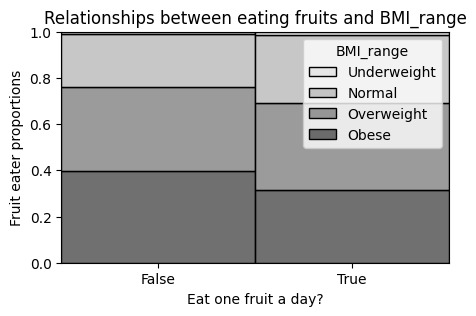

In [58]:
plt.figure(figsize = [5, 3])
ticks =[True,False]
labels=['{}'.format(t) for t in ticks]
diabetes_bool.Fruits=diabetes_bool.Fruits.astype('category')
sns.histplot(x='Fruits', hue='BMI_range', data=diabetes_bool,multiple='fill',palette='Greys')
plt.xticks(ticks,labels)
#plt.legend(['Yes','No'],title = 'BMI range')
plt.ylabel('Fruit eater proportions')
plt.xlabel('Eat one fruit a day?')
plt.title('Relationships between eating fruits and BMI_range');

In [18]:
diabetes.columns

#### Cross-Correlation Analysis and Raising Data Questions findings
>*	Amount of diabetes is raising from 1% at 18-24 to 10% at 40-45 to its maximum above 20% at around 70-74.
>*	There is insignificant difference between females around 12% with diabetes and males around 15% having diabetes. 
>*	Amount of diabetes growing gradually with age in both male in females from less than 1% for both females and males together in 18-24 to around 20% for each sex in all age group starting with 60-64. In each age group upto 39 years old  females have upto 1% more diabetes than males. After 35-39 the amount of diabetes in males gradually overtaking the amount of diabetes in females. Males have upto 2% more diabetes than females in the later stages of life.
>*	In all age groups there are more individuals with diabetes feeling poor than individuals with diabetes feeling excellent. There is negative correlation between amount of individuals having diabetes and amount of individuals feeling good.
>*	25% individuals  with <15k income have diabetes versus 10% diabetic individuals with 50k income. There is negative correlation between amount of individuals having diabetes and amount they earn.
>*	Above 25% individuals who didn't graduate high school have diabetes versus 10% diabetic individuals who graduated college or similar. There is negative correlation between amount of individuals having diabetes and level of their education.
>*	20% of obese and 10% of overweight individuals have diabetes, versus 5% each of underweight and normal.
>*	Although generally the amount of diabetes has positive correlation with BMI in all income group the lower is income the more individuals  having  diabetes with even underweight and normal BMI. The greater is income the more individuals  having  diabetes with overweight and obese BMI.  
>*	Similarly to Income range the lower is level of education the more individuals having diabetes with even underweight and normal BMI. The higher is  level of education the more individuals having diabetes with overweight and obese BMI.
>*	Unsurprisingly, there is positive correlation between level of education and income range.
>*	The lower is income - the more individuals don't have any healtcare cover. 10% individuals without cover with income <15K versus around 2% with income >50K.
>*	The lower is income - the more individuals can't afford doctor when needed. 20% individuals didn't see the doctor because of costs with income <15K versus around 4% with income >50K. 
>*	25% of individuals with high blood pressure have diabetes versus around 5% with normal blood pressure.
>*	21% of individuals with high cholesterol have diabetes versus around 8% with normal cholesterol.
>*	Around 12% of individuals who are eating 1 vegetable a day have diabetes versus around 18% who don't eat 1 vegetable a day
>* Around 40% of individuals who are eating 1 vegetable a day have diabetes versus around 47% who don't eat 1 vegetable a day
>*	Around 12% of individuals who are eating 1 fruit a day have diabetes versus around 17% who don't eat 1 fruit a day.
>*	Around 40% of individuals who are eating 1 fruit a day have high cholesterol versus around 44% who don't eat 1 fruit a day.
>*	Below 30% of individuals with income lower than <25K are not eating enough fruit against 50% with income >50K. 20% of individuals with income lower than <25K are eating enough fruit against 55% with income >50K
>* Around 35% of individuals with income lower than <25K are not eating enough vegetables against 40% with income >50K. 20% of individuals with income lower than <25K are eating enough fruit against 55% with income >50K.
>*	Around 30% of individuals who are having difficulty to walk or climb stairs have diabetes versus around 10% who haven't difficulties.
>*	Around 50%  are obese and 30%  are overweight (80% together) of all individuals having difficulty to walk or climb stairs versus around 30% obese and 40% overweight (70% together) of all individual who haven't difficulties. 
>*	Around 12% of individuals who had cholesterol check last 5 years have diabetes versus around 2% who hadn't the check.
>*	Over 40% of individuals who had cholesterol check last 5 years have high cholesterol versus around over 20% who hadn't the check.
>*	Around 31% of individuals with the heart desease or attack have diabetes versus around 11% without it.
>*	Around 31% of individuals with the stroke have diabetes versus around 12% without it.
>*	Around 21% of individuals who were not physically active last 30 days have diabetes versus around 10% who were active.
>*	Around 30%  are obese and 40%  are overweight (70% together) of all individuals exercising last month versus around 45% obese and 35% overweight (80% together) of all individual who haven't exercised. 
>*	Around 35% of individuals with income lower than <25K are  not exercising against around 38% with income >50K. 20% of individuals with income lower than <25K are exercising enough fruit against 58% with income >50K. 
>*	Surprisingly, around 5% of individuals consuming more than 7/14 for female/male a week have diabetes versus around 17% who are drinking moderately.
>*	Around 15% of individuals who have ever smoked or smoking have diabetes versus around 12% who have never smoked
>*	10% of individuals without any physical illnesses last 30 days have diabetes. 20%-30% of individuals with physical illnesses what lasted for 6-10,11-15,16-20,21-25,26-30 days and 13% what lasted for 1-5 day have diabetes.
>*	12% of individuals without any mental issues last 30 days have diabetes. Around 20% of individuals with mental issues what lasted for 11-15,16-20,21-25,26-30 days and 10%,15% what lasted for 1-5,6-10 days respectively have diabetes.
>*	Individuals who are feeling better have less mental issues than the ones who are feeleng worse as well they have less long lasting mental issues together with the diabetes.
>*	Generally, individuals who are feeling better have less long lasting physical issues together with the diabetes than the ones who are feeleng worse.  Individuals with 30 days physical illness have proportionally similiar amount of diabetes and could feel anything from poor to excellent. Individuals who are feeling poor have less short up to 10 days physical ilnesses than other individuals.
>*	Individuals consuming more alcohol have shorter physical illness/injury days and generally feel better. There is no difference for individuals in all general Health groups with no physical illness/injury or 30 days physical illness/injury. Individuals with poor general health drink the least during all physical illness/injury period.
>*	There is no much difference between individuals in all general Health groups, excluding individuals with poor general health who drink the least during all mental issue period.
>*	Below 30% of individuals with income lower than <25K are not eating enough fruit against 50% with income >50K. 20% of individuals with income lower than <25K are eating enough fruit against 55% with income >50K.
>*	Individuals with higher income feel better than individuals with lower income either they have diabetes or not. The perception of individuals health has positive correlation with individuals income.

### Cross-Correlation Analysis and Raising Data Questions summary

Following factors can significantly increase the risk of diabetes or are signs of undescovered diabetes and are chosen because they show greater impact on the amount of diabetes in individuals than other factors:

- Age above 40-45 (10% have diabetes)
- Obese and overweight individuals (10% -20% have diabetes)
- Income range <25K (25-20% have diabetes)
- Individuals who didn't graduate high school (>25% have diabetes)
- Individuals with high blood pressure (25% have diabetes)
- Individuals with high cholesterol (21% have diabetes)
- Individuals who are having difficulty to walk or climb stairs (around 30% have diabetes) 
- Individuals with the heart desease or attack (around 31%  have diabetes)
- Individuals with the stroke (around 31% have diabetes)
- Individuals who were not physically active (around 21% have diabetes)
- Individuals with mental issues what lasted for 11-30 days (around 20% have diabetes)
- Individuals with physical illnesses what lasted for 6-30 days (20%-30% around 20% have diabetes)


### Data Enrichment

There is no information about what type of diabetes have indiviaduals in the dataset. 
Type 1 diabetes is thought to be caused by an immune reaction. The known risk factors are family history and age. It's more often developing in children, teenagers and young adults, but could develop at any age. There is no known prevention.

Type 2 diabetes could be preventable or delayed.
The type of diabetes in dataset should be either clarified if it is Type 2 or information about the diabetes type shoulb be obtained.

The following  are additional known diabetes risk factors or early signs of diabetes Type 2:

- Race/Ethnicity
- Family history of diabetes
- Gestational diabetes (diabetes during pregnancy) 
- Given birth to a baby who weighed over 9 pounds
- Polycystic ovary syndrome (PCOS)
- Erectile Dysfunction 

I would get medical records of individuals  (if posible) and left join them to diabetes dataset on uniqueID. I would add these factors as separate columns/variables with two values True/False and column: Diabetes Type with values 1 or 2. It would give me the possibility to analyse both types of diabetes (if it's the case) if these factors have the impact at least as significant as factors mentioned in the analysis summary. I would analyse the same ways as I analysed the factors availabe in the dataset.
I feel that the analysis is lacking deeper understanding of differences between diabetes in men and diabetes in woman. There are common risk factors for both male and female, but there are factors different for each sex.

## Recommendations

It's seen from the dataset analysys that indiviaduals should stay healthy and fit to reduce risk of diabetes and related ilnesses.
It's clear that individuals with lower income and basic level of education are feeling worse with or without diabetes, eating slightly less fruit and vegetables, exercising less than individuals with higher income.
Since it's difficult to influence socio-demographic factors I would recommend increase campaigns of healthy lifestyle promotion and risk factor of diabetes for individuals with low incomes as well as campaign for individuals with high income about importance of moderation in eating and necessity to be active.
I would advise to start education campaigns about lifestyle and diabetes in the early stages of life: primary and secondary schools.
Staying positive and relaxed is important factor of being healthy.


## Analysis Summary

The goal in this project was to explore some of the following research questions:

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes? 
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

To answer these questions we used four dataset demographic_data.csv, id_label.csv, health_measures.csv, enriched_data.csv. The data sets contain information about  253680 individuals with 22 metrics for each individual including socio-demografic factors like age, sex and income etc; behavioral factors: exercising and eating habits, smoking etc; medical history: having stroke, high blood pressure etc.

Before analysis four datasets were joined into one table 'diabetes',  the data was cleaned - changing variable type to the appropriate.

Discovered outliers for BMI, MentHlth and PhysHlth was vital markers of diabetes, so they were left for analysis. 3 new categorical variables was defined with BMI ranges and MentHlth/PhysHlth with ranges 0 and from 1-30 every 5 days to include outliers in the analysis.
4 new variables with meaningful values of variables 'GenHlth','Age' ,'Education','Income' (descriptions instead numbers) were created to ease understanding of data.
 
24 distribution charts were ploted to understand dataset variable distribution. During bivariate multivariate exploration 41 charts were ploted to understand relationsheeps between variables and find out their imact to diabetes.

**1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?**

From my opinian the data in this project is lacking vital information about medical history of individuals like Race/Ethnicity, Family history of diabetes etc and information of type of diabetes. 
(see Data Enrichment) to give more accurate prediction of whether an individual has diabetes. The data can give some level of prediction, but for more accurate results it should be enriched with additional information.

**2. What risk factors are most predictive of diabetes risk?**

12 factors was defined as ones that can significantly increase the risk of diabetes or are signs of undescovered diabetes. They were chosen because they showed greater impact on the amount of diabetes in individuals than other factors. They are: 

Bio-social factors:
-  Age
-  BMI range
-  Income                      	
-  Education level                     
Behavioral factors:
- Physical activity
Medical history:
- High blood pressure 
- High cholesterol 
- Difficulty to walk or climb stairs 
- Heart desease or attack
- Stroke
- Mental issues
- Physical illnesses     

**3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?**

We can use the above risk factors to predict whether an individual has Type 2 diabetes. The following factors could be used to segment individuals and assign diabetes risk levels. To increase the level of prediction the data should be enriched with additional information.

**4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?**

We can create a short form of questions from the datasets to predict whether an individual has Type 2 diabetes. The answers on these question are given in Cross-Correlation Analysis and Raising Data Questions summary:

- Is individual above 40-45 years old?
- Has individual BMI range obese or overweight?
- Has individual income range <25K?
- Did ndividual graduate high school?
- Has individual the high blood pressure?
- Has individual the high cholesterol?
- Are individual having difficulty to walk or climb stairs? 
- Has/had individual the heart desease or attack?
- Has/had individual the stroke?
- Was individual physically active last month (besides the work)?
- Has/had individual any mental issues what lasted for 11-30 days last month?
- Has/had ndividual any physical illnesses what lasted for 6-30 dayslast month?

To increase the level of prediction the data should be enriched with additional information.









